# You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from pandas_profiling import ProfileReport

**1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)**

In [3]:
df=pd.read_excel("Election_Data.xlsx",index_col=0)

In [4]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
1  Labour   43                       3                        3      4      1   
2  Labour   36                       4                        4      4      4   
3  Labour   35                       4                        4      5      2   
4  Labour   24                       4                        2      2      1   
5  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
1       2                    2  female  
2       5                    2    male  
3       3                    2    male  
4       4                    0  female  
5       6                    2    male

In [5]:
#ProfileReport(df)

In [6]:
df.shape

(1525, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [8]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There is no missing values in the dataset

In [9]:
df.duplicated().sum()

8

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

Now, we have removed the duplicated rows from our dataset

In [12]:
df.shape

(1517, 9)

Now after removing the duplicated values, the dataset now has 1517 rows of data.

In [13]:
df.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1517.0  54.241266  15.701741  24.0  41.0  53.0  67.0   
economic.cond.national   1517.0   3.245221   0.881792   1.0   3.0   3.0   4.0   
economic.cond.household  1517.0   3.137772   0.931069   1.0   3.0   3.0   4.0   
Blair                    1517.0   3.335531   1.174772   1.0   2.0   4.0   4.0   
Hague                    1517.0   2.749506   1.232479   1.0   2.0   2.0   4.0   
Europe                   1517.0   6.740277   3.299043   1.0   4.0   6.0  10.0   
political.knowledge      1517.0   1.540541   1.084417   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [14]:
cat=["vote","gender"]

In [15]:
df[cat].describe().T

count unique     top  freq
vote    1517      2  Labour  1057
gender  1517      2  female   808

In [16]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

The skew value for the age variable, is 0.13, which means that the age variable is almost normally distributed.

The rest of the variables are categorical, so we do not need to check for the normal distribution of these variables.

In [17]:
df["economic.cond.national"].value_counts()

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

In [18]:
df["economic.cond.household"].value_counts()

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [19]:
df["Blair"].value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

In [20]:
df["Hague"].value_counts()

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

In [21]:
df["Europe"].value_counts()

11    338
6     207
3     128
4     126
5     123
8     111
9     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

In [22]:
df["political.knowledge"].value_counts()

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

In [23]:
df["gender"].value_counts()

female    808
male      709
Name: gender, dtype: int64

The gender variable has similar value counts

In [24]:
df["vote"].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

The Labour party has got more votes than the conservative party

In [25]:
df["vote"].value_counts(1)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

We can see that the data is unbalanced. The Labour party vote has 69.68% of the data, and the remaining 30.32% vote is from the Conservative party.

We can perform SMOTE, to see if the balancing act makes increase in the performance of the models.

**1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)**

Let us first rename the columns initially for our own comfort

In [26]:
df=df.rename(columns={
    "economic.cond.national":"economic_cond_national",
    "economic.cond.household":"economic_cond_household",
    "political.knowledge":"political_knowledge"
})

In [27]:
df.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
1  Labour   43                       3                        3      4      1   
2  Labour   36                       4                        4      4      4   
3  Labour   35                       4                        4      5      2   
4  Labour   24                       4                        2      2      1   
5  Labour   41                       2                        2      1      1   

   Europe  political_knowledge  gender  
1       2                    2  female  
2       5                    2    male  
3       3                    2    male  
4       4                    0  female  
5       6                    2    male

We can see that only the age variable is continuous. The rest of the variables even though they are numeric, they are categorical variables.

In [28]:
feature_list = ["age","economic_cond_national","economic_cond_household","Blair","Hague","Europe","political_knowledge"]

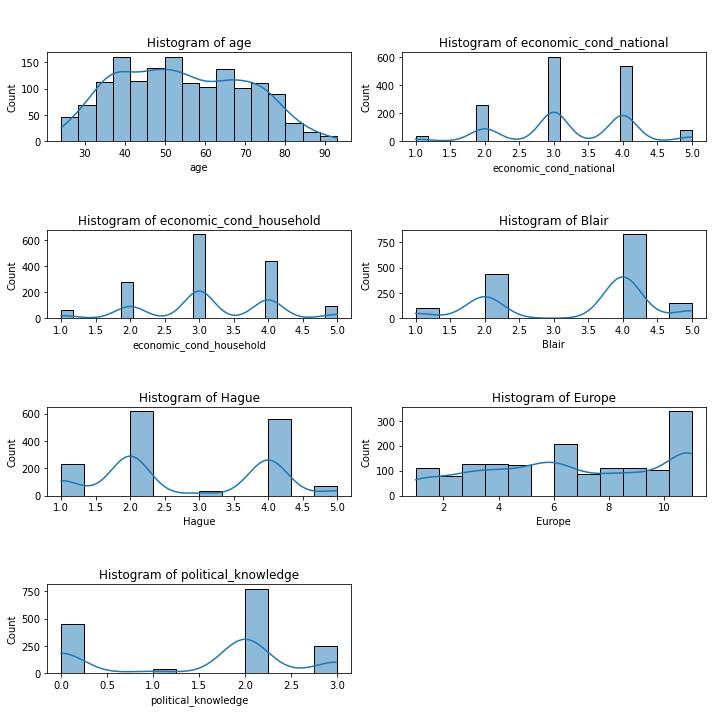

In [29]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.histplot(df[feature_list[i]],kde=True);
    plt.title("\n\nHistogram of {}".format(feature_list[i]))
    plt.tight_layout()

We can see that the age variable is almost normally distributed. The rest of the variables are not continuous variables, ut they are numerical. Those variables are categorical variables in a sense.

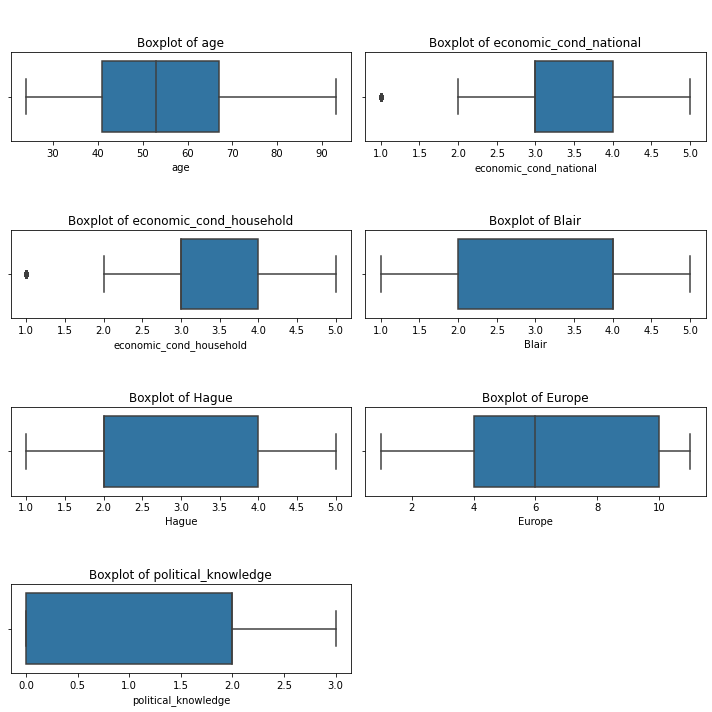

In [30]:
plt.figure(figsize=(10,10))
for i in range (len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[feature_list[i]]);
    plt.title("\n\nBoxplot of {}".format(feature_list[i]))
    plt.tight_layout()

We can see outliers in only economic condtion national, and economic condition household columns. However, as these values are essentially ordinal values, we should not impute them.

We can see that there are no outliers in the age column, which is the only continuous numerical variable column. However let us confirm it

In [31]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [32]:
LL1,UL1=remove_outlier(df["age"])
print("The percentage of outliers in age Upper is",round(df[df["age"]>UL1]["age"].count()*100/len(df),2),"%")
print("The percentage of outliers in age lower is",round(df[df["age"]<LL1]["age"].count()*100/len(df),2),"%")

The percentage of outliers in age Upper is 0.0 %
The percentage of outliers in age lower is 0.0 %


We can see that the age variable is almost normally distributed.

In [33]:
df["vote"].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [34]:
df["gender"].value_counts()

female    808
male      709
Name: gender, dtype: int64

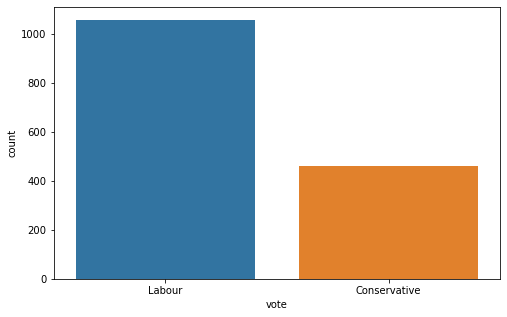

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(df["vote"])
plt.show()

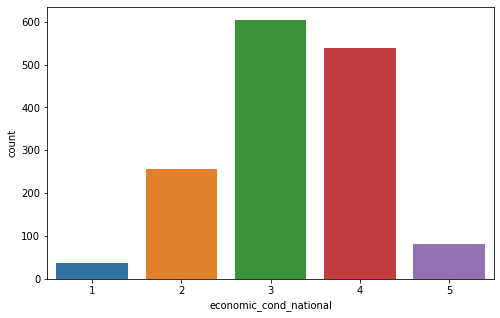

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(df["economic_cond_national"])
plt.show()

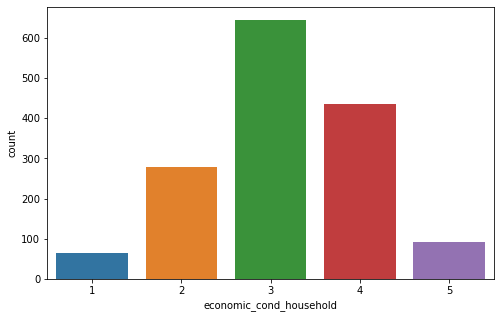

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(df["economic_cond_household"])
plt.show()

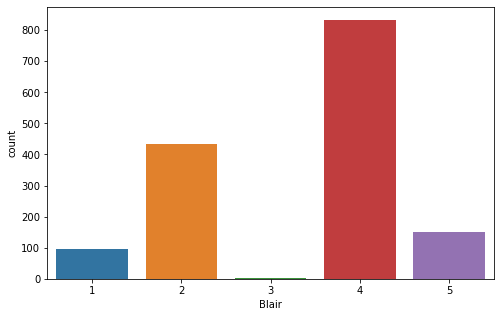

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(df["Blair"])
plt.show()

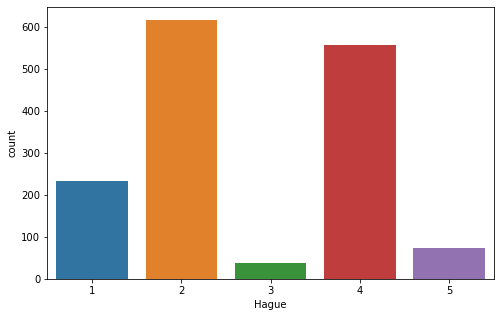

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(df["Hague"])
plt.show()

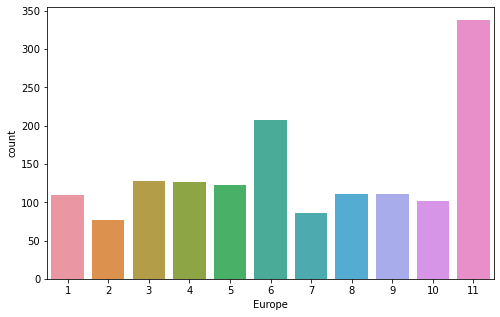

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(df["Europe"])
plt.show()

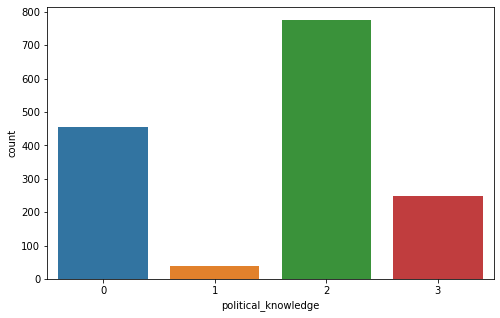

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(df["political_knowledge"])
plt.show()

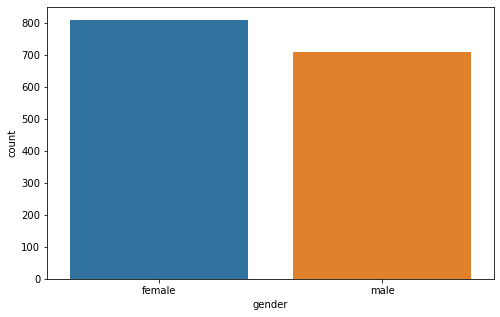

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(df["gender"])
plt.show()

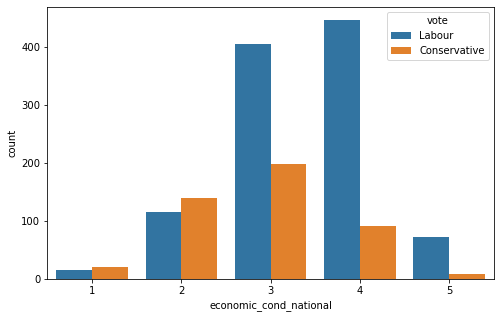

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(df["economic_cond_national"],hue=df["vote"])
plt.show()

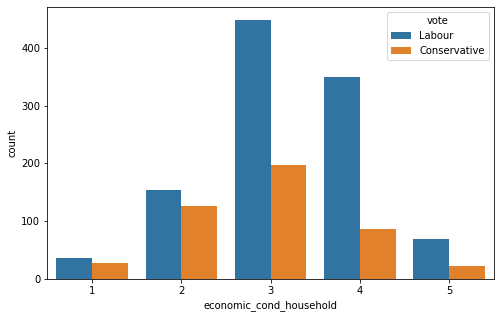

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(df["economic_cond_household"],hue=df["vote"])
plt.show()

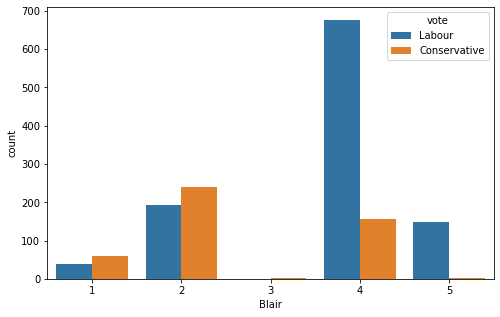

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(df["Blair"],hue=df["vote"])
plt.show()

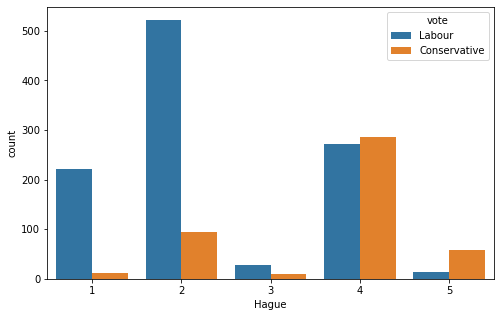

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(df["Hague"],hue=df["vote"])
plt.show()

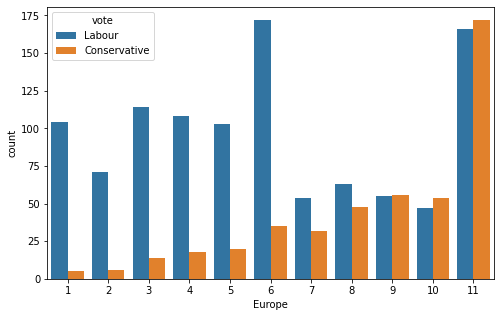

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(df["Europe"],hue=df["vote"])
plt.show()

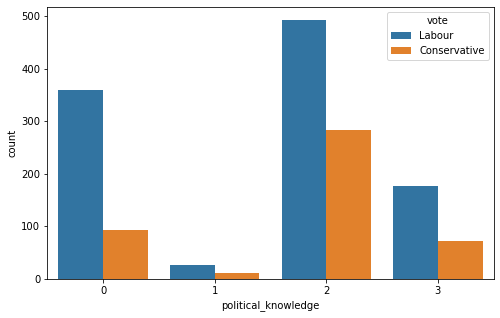

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(df["political_knowledge"],hue=df["vote"])
plt.show()

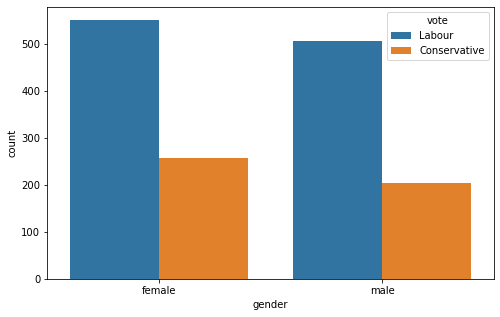

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(df["gender"],hue=df["vote"])
plt.show()

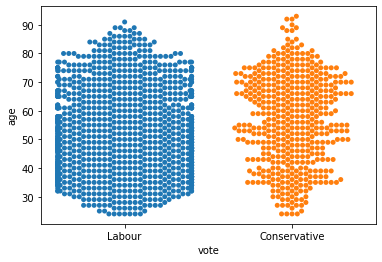

In [50]:
sns.swarmplot(x="vote",y="age",data=df)
plt.show()

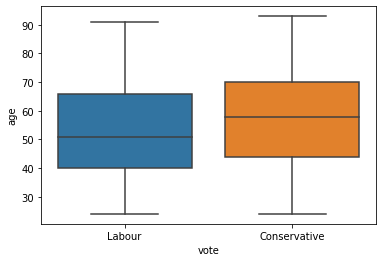

In [51]:
sns.boxplot(x="vote",y="age",data=df)
plt.show()

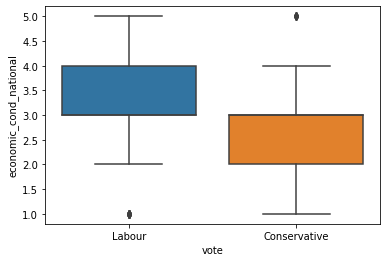

In [52]:
sns.boxplot(x="vote",y="economic_cond_national",data=df)
plt.show()

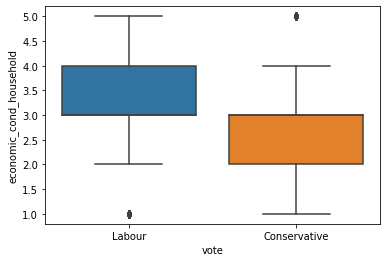

In [53]:
sns.boxplot(x="vote",y="economic_cond_household",data=df)
plt.show()

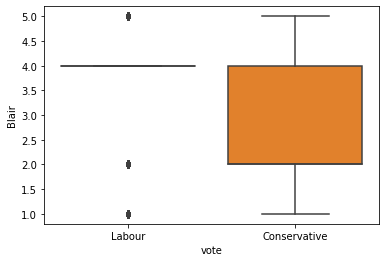

In [54]:
sns.boxplot(x="vote",y="Blair",data=df)
plt.show()

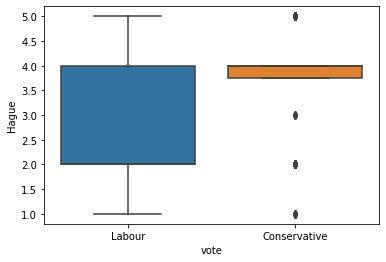

In [55]:
sns.boxplot(x="vote",y="Hague",data=df)
plt.show()

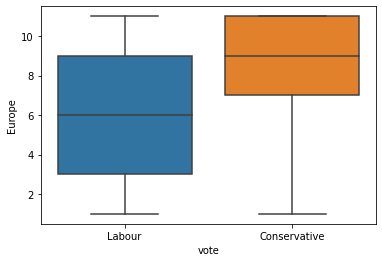

In [56]:
sns.boxplot(x="vote",y="Europe",data=df)
plt.show()

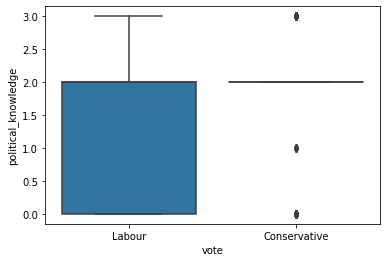

In [57]:
sns.boxplot(x="vote",y="political_knowledge",data=df)
plt.show()

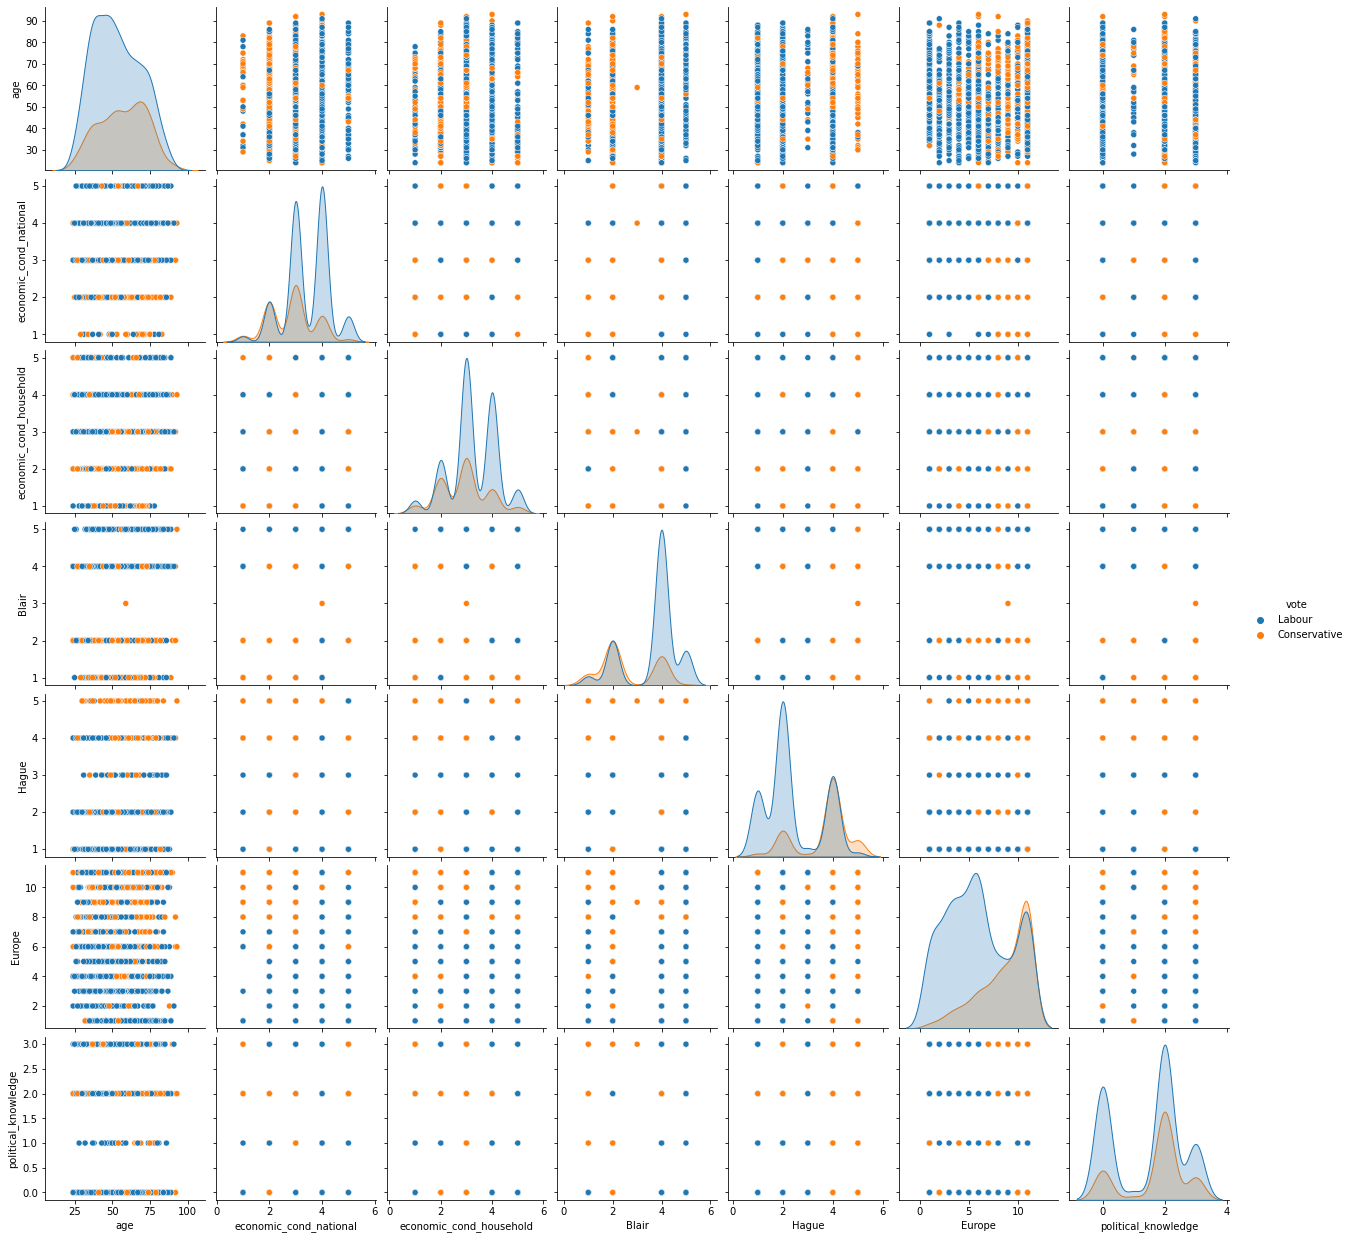

In [58]:
sns.pairplot(df,hue="vote")
plt.show()

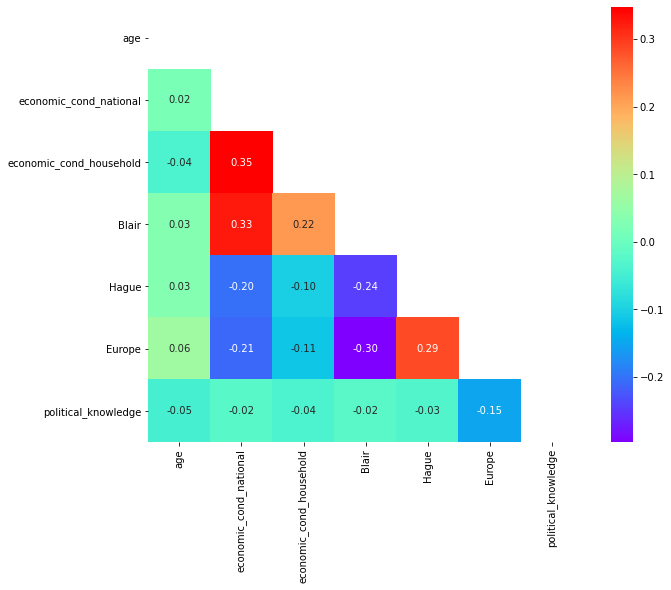

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),square=True,annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr()))
plt.show()

**1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)**

In [60]:
cols=["gender"]

In [61]:
df=pd.get_dummies(df, columns=cols)

In [62]:
df.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
1  Labour   43                       3                        3      4      1   
2  Labour   36                       4                        4      4      4   
3  Labour   35                       4                        4      5      2   
4  Labour   24                       4                        2      2      1   
5  Labour   41                       2                        2      1      1   

   Europe  political_knowledge  gender_female  gender_male  
1       2                    2              1            0  
2       5                    2              0            1  
3       3                    2              0            1  
4       4                    0              1            0  
5       6                    2              0            1

In [63]:
df.shape

(1517, 10)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic_cond_national   1517 non-null   int64 
 3   economic_cond_household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political_knowledge      1517 non-null   int64 
 8   gender_female            1517 non-null   uint8 
 9   gender_male              1517 non-null   uint8 
dtypes: int64(7), object(1), uint8(2)
memory usage: 141.9+ KB


In [65]:
df["vote"]=pd.Categorical(df["vote"]).codes

In [66]:
df["vote"].value_counts()

1    1057
0     460
Name: vote, dtype: int64

0  -  Labour Party votes

1  -  Conservative Party votes

In [67]:
df.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
1     1   43                       3                        3      4      1   
2     1   36                       4                        4      4      4   
3     1   35                       4                        4      5      2   
4     1   24                       4                        2      2      1   
5     1   41                       2                        2      1      1   

   Europe  political_knowledge  gender_female  gender_male  
1       2                    2              1            0  
2       5                    2              0            1  
3       3                    2              0            1  
4       4                    0              1            0  
5       6                    2              0            1

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic_cond_national   1517 non-null   int64
 3   economic_cond_household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political_knowledge      1517 non-null   int64
 8   gender_female            1517 non-null   uint8
 9   gender_male              1517 non-null   uint8
dtypes: int64(7), int8(1), uint8(2)
memory usage: 131.5 KB


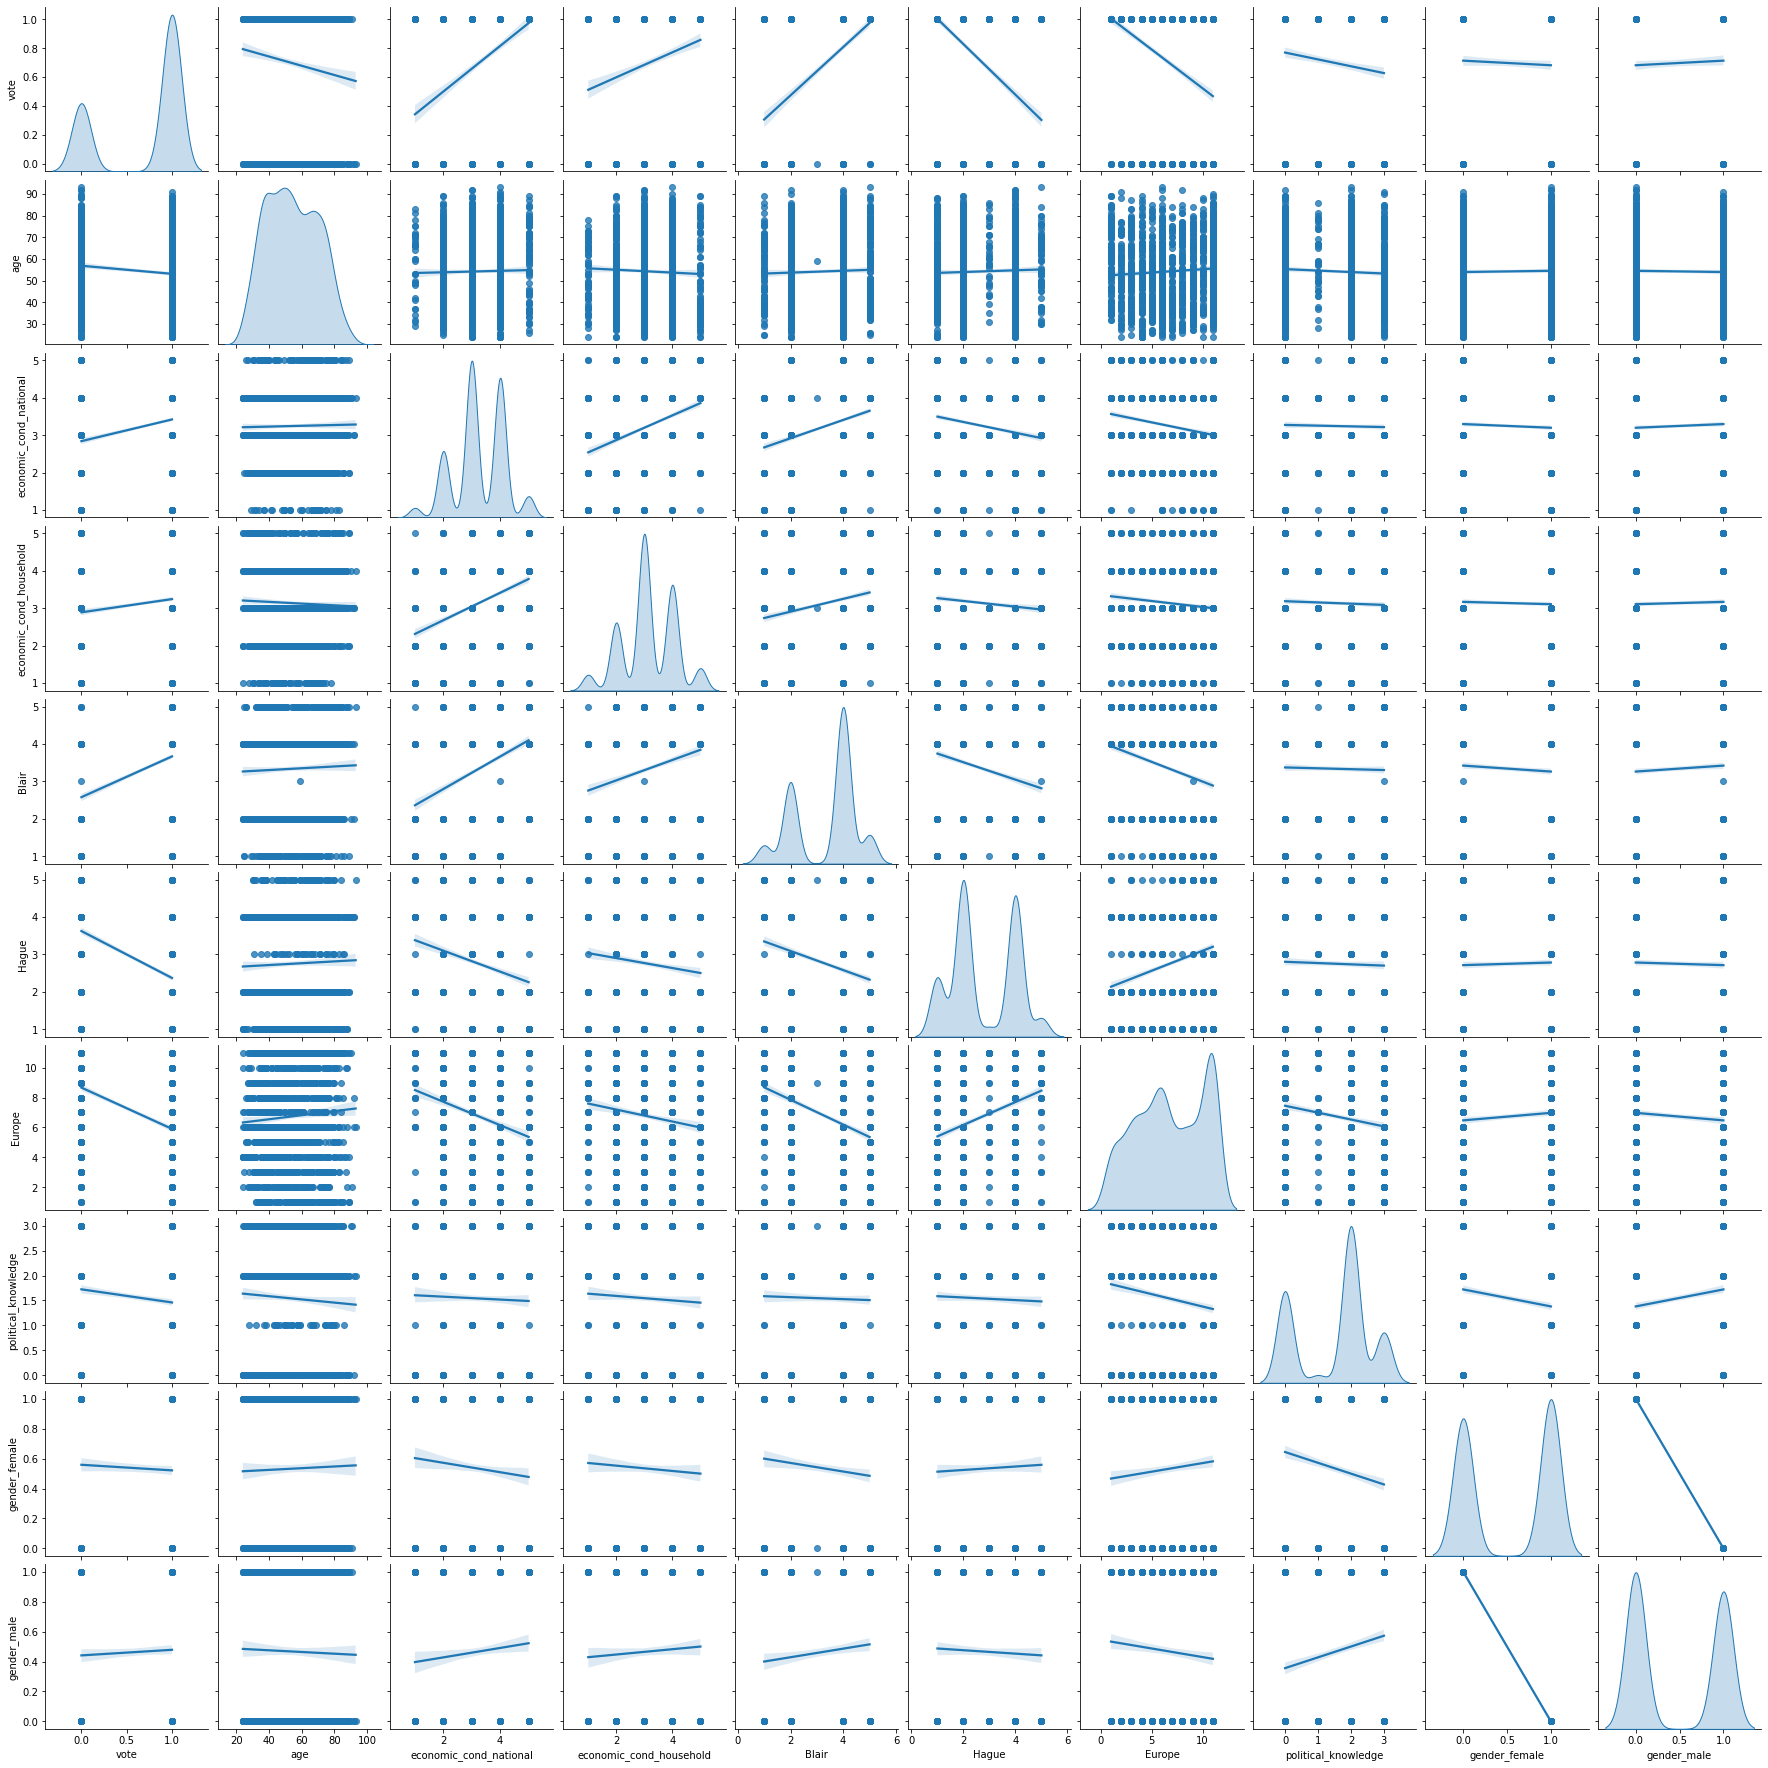

In [69]:
sns.pairplot(df, diag_kind="kde",kind="reg")
plt.show()

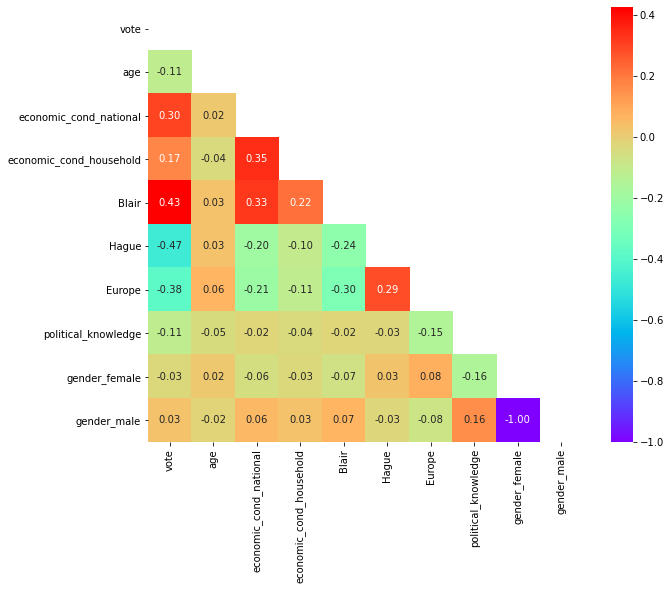

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),square=True,annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr()))
plt.show()

We can see that there are not many good predictors for the vote,as there is no high value of correlation among the vote column and the rest of th columns. 

The maximum value of correlation between votes and other columns is -0.47, (Vote vs Hague)

**In this dataset, we will be performing some methods like KNN model, which require scaling to do a good job, as it is a distance based model. So we will be using scaled data for the models which require scaling, and use the unscaled data for the rest of the models which are not sensitive to unscaled data**

Scaling not required for Logistic Regression, Linear discriminant Analysis, Naive Bayes, Bagging usng Random Forest, Boosting.

Scaling is required for performing KNN model, as it is a distance based metric.

In [71]:
df_1=df.copy()

In [72]:
df_1.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
1     1   43                       3                        3      4      1   
2     1   36                       4                        4      4      4   
3     1   35                       4                        4      5      2   
4     1   24                       4                        2      2      1   
5     1   41                       2                        2      1      1   

   Europe  political_knowledge  gender_female  gender_male  
1       2                    2              1            0  
2       5                    2              0            1  
3       3                    2              0            1  
4       4                    0              1            0  
5       6                    2              0            1

In [73]:
#variation inflation factor for checking correlations among variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
#defining a function for checking Variation Inflation factor. 
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [75]:
X = df[["age","economic_cond_national","economic_cond_household","Blair","Hague","political_knowledge","gender_female"]]
checkvif(X)

                 Variables        VIF
0                      age  10.118283
1   economic_cond_national  15.882196
2  economic_cond_household  12.779358
3                    Blair   9.795188
4                    Hague   5.030762
5      political_knowledge   2.838729
6            gender_female   2.095795


We can see that 4 out of 7 variables have a VIF less than 10, which is a good sighn. However the rest of the variables have VIF value lesser than 20. So we can proceed to build the models with all the variables, as there is no big multicollinearity issue.

In [76]:
#Splitting the dependent and independent variables
x=df.drop("vote", axis=1)
y=df.pop("vote")

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
df.head()

age  economic_cond_national  economic_cond_household  Blair  Hague  Europe  \
1   43                       3                        3      4      1       2   
2   36                       4                        4      4      4       5   
3   35                       4                        4      5      2       3   
4   24                       4                        2      2      1       4   
5   41                       2                        2      1      1       6   

   political_knowledge  gender_female  gender_male  
1                    2              1            0  
2                    2              0            1  
3                    2              0            1  
4                    0              1            0  
5                    2              0            1

In [79]:
df_1.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
1     1   43                       3                        3      4      1   
2     1   36                       4                        4      4      4   
3     1   35                       4                        4      5      2   
4     1   24                       4                        2      2      1   
5     1   41                       2                        2      1      1   

   Europe  political_knowledge  gender_female  gender_male  
1       2                    2              1            0  
2       5                    2              0            1  
3       3                    2              0            1  
4       4                    0              1            0  
5       6                    2              0            1

In [80]:
x_train,x_test,train_labels,test_labels=train_test_split(x,y,test_size=0.30,random_state=1,stratify=df_1["vote"])

In [81]:
x_train.shape

(1061, 9)

In [82]:
x_test.shape

(456, 9)

In [83]:
train_labels.shape

(1061,)

In [84]:
test_labels.shape

(456,)

In [85]:
x_train.head()

age  economic_cond_national  economic_cond_household  Blair  Hague  \
534    71                       3                        3      4      2   
709    57                       4                        5      4      1   
1145   24                       3                        4      2      4   
1082   43                       4                        4      2      3   
958    37                       3                        2      4      2   

      Europe  political_knowledge  gender_female  gender_male  
534       11                    0              1            0  
709        3                    2              1            0  
1145      11                    0              0            1  
1082       5                    0              0            1  
958        7                    2              0            1

In [86]:
train_labels.head()

534     1
709     1
1145    0
1082    1
958     1
Name: vote, dtype: int8

In [87]:
train_labels.value_counts(1)

1    0.696513
0    0.303487
Name: vote, dtype: float64

In [88]:
x_test.head()

age  economic_cond_national  economic_cond_household  Blair  Hague  \
275    71                       2                        3      4      2   
768    31                       2                        2      2      4   
417    35                       4                        3      2      1   
1034   34                       4                        4      4      2   
508    40                       3                        4      4      2   

      Europe  political_knowledge  gender_female  gender_male  
275       11                    0              1            0  
768        5                    2              0            1  
417        7                    2              0            1  
1034       7                    0              1            0  
508        7                    3              0            1

In [89]:
test_labels.head()

275     1
768     0
417     1
1034    1
508     1
Name: vote, dtype: int8

In [90]:
test_labels.value_counts(1)

1    0.697368
0    0.302632
Name: vote, dtype: float64

**Scaling for performing KNN model**

In [91]:
columns=x_train.columns

In [92]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [93]:
sc=StandardScaler()

In [94]:
#Scaling the Train and test data
x_trains=pd.DataFrame(sc.fit_transform(x_train))
x_tests=pd.DataFrame(sc.transform(x_test))

In [95]:
x_trains.columns=columns

In [96]:
x_tests.columns=columns

In [97]:
x_trains.head()

age  economic_cond_national  economic_cond_household     Blair  \
0  1.078284               -0.274403                -0.137087  0.557983   
1  0.181786                0.858443                 1.986262  0.557983   
2 -1.931388               -0.274403                 0.924587 -1.180695   
3 -0.714712                0.858443                 0.924587 -1.180695   
4 -1.098925               -0.274403                -1.198761  0.557983   

      Hague    Europe  political_knowledge  gender_female  gender_male  
0 -0.625062  1.316728            -1.417763       0.917613    -0.917613  
1 -1.441798 -1.148833             0.422294       0.917613    -0.917613  
2  1.008412  1.316728            -1.417763      -1.089784     1.089784  
3  0.191675 -0.532443            -1.417763      -1.089784     1.089784  
4 -0.625062  0.083948             0.422294      -1.089784     1.089784

**1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)**

In [98]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [99]:
#importing grid search cv function for better model performance
from sklearn.model_selection import GridSearchCV

**Logistic Regression**

First let us prepare a base model, and see if we require to use the parameter grid.

In [100]:
# Logistic Regression Model Creation
model_lr_1 = LogisticRegression(max_iter=1000,n_jobs=2)

In [101]:
model_lr_1=model_lr_1.fit(x_train,train_labels)

In [102]:
model_lr_1.score(x_train,train_labels)

0.8284637134778511

In [103]:
model_lr_1.score(x_test,test_labels)

0.8552631578947368

The model has a good accuracy score. The model is not overfitting.

In [104]:
ytest_predict_lr_1=model_lr_1.predict(x_test)
ytrain_predict_lr_1=model_lr_1.predict(x_train)

In [105]:
ytest_predict_lr_1

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Linear Discriminant Analysis**

Performing the base model

In [106]:
model_lda_2=LinearDiscriminantAnalysis()

In [107]:
#Fitting the training data in the model
model_lda_2=model_lda_2.fit(x_train, train_labels)

In [108]:
model_lda_2.score(x_train,train_labels)

0.822808671065033

In [109]:
model_lda_2.score(x_test,test_labels)

0.8530701754385965

This model too ofers a similar score.

In [110]:
ytrain_predict_lda_2=model_lda_2.predict(x_train)
ytest_predict_lda_2=model_lda_2.predict(x_test)

**1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)**

In [111]:
#importing necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

**Naive Bayes**

In [112]:
model_NB_3=GaussianNB()

In [113]:
model_NB_3=model_NB_3.fit(x_train,train_labels)

In [114]:
model_NB_3.score(x_train,train_labels)

0.8199811498586239

In [115]:
model_NB_3.score(x_test,test_labels)

0.8596491228070176

In [116]:
ytrain_predict_NB_3=model_NB_3.predict(x_train)
ytest_predict_NB_3=model_NB_3.predict(x_test)

**KNN Model**

In [117]:
model_KNN_4=KNeighborsClassifier()
model_KNN_4=model_KNN_4.fit(x_trains,train_labels)

In [118]:
model_KNN_4.score(x_trains,train_labels)

0.8623939679547596

In [119]:
model_KNN_4.score(x_tests,test_labels)

0.8377192982456141

In [120]:
ytrain_predict_KNN_4=model_KNN_4.predict(x_trains)
ytest_predict_KNN_4=model_KNN_4.predict(x_tests)

**1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)**

**Logistic Regression model tuning**

In [121]:
#Giving parameter grid for using GridSearchCV
param_grid_5={
    "penalty":["l2","none"],
    "solver":["sag","lbfgs","newton-cg"],
    "tol":[0.0001,0.00001,0.001]
}

In [122]:
# Logistic Regression Model Creation
model_lr_5 = LogisticRegression(max_iter=1000,n_jobs=2)

In [123]:
grid_search_5=GridSearchCV(estimator=model_lr_5,param_grid=param_grid_5,cv=10)

In [124]:
#Fitting the training data in the model
grid_search_5.fit(x_train, train_labels)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000, n_jobs=2),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05, 0.001]})

In [125]:
#Finding out best parameters
grid_search_5.best_params_

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}

In [126]:
best_grid_lr_5=grid_search_5.best_estimator_

In [127]:
best_grid_lr_5.score(x_train,train_labels)

0.827521206409048

In [128]:
best_grid_lr_5.score(x_test,test_labels)

0.8618421052631579

In [129]:
ytrain_predict_lr_5=best_grid_lr_5.predict(x_train)
ytest_predict_lr_5=best_grid_lr_5.predict(x_test)

The model performance on training set is little low, but has a better performance on the testing set. The model looks to be a little underfit on the training data, but the value is not very less, so we can say that the model is not under-fitting

**Linear Discriminant Analysis**

In [130]:
model_lda_6=LinearDiscriminantAnalysis()

In [131]:
#Giving parameter grid for using GridSearchCV
param_grid_6={
    "solver":["svd","lsqr","eigen"],
    "shrinkage":["auto","float","None"],
    "tol":[0.0001,0.00001,0.001]
}

In [132]:
grid_search_lda_6=GridSearchCV(estimator=model_lda_6,param_grid=param_grid_6,cv=10)

In [133]:
#Fitting the training data in the model
grid_search_lda_6.fit(x_train, train_labels)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05, 0.001]})

In [134]:
#Finding out best parameters
grid_search_lda_6.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [135]:
best_grid_lda_6=grid_search_lda_6.best_estimator_

In [136]:
best_grid_lda_6.score(x_train,train_labels)

0.823751178133836

In [137]:
best_grid_lda_6.score(x_test,test_labels)

0.8574561403508771

In [138]:
ytrain_predict_lda_6=best_grid_lda_6.predict(x_train)
ytest_predict_lda_6=best_grid_lda_6.predict(x_test)

**KNN Model**

In [139]:
scores=[]

In [140]:
for k in range(1,50):
    model_KNN=KNeighborsClassifier(n_neighbors=k,weights="distance")
    model_KNN.fit(x_trains,train_labels)
    scores.append(model_KNN.score(x_tests,test_labels))

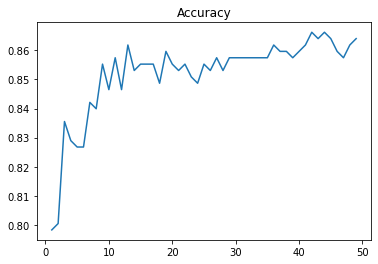

In [141]:
plt.plot(range(1,50),scores)
plt.title("Accuracy")
plt.show()

In [142]:
scores

[0.7982456140350878,
 0.8004385964912281,
 0.8355263157894737,
 0.8289473684210527,
 0.8267543859649122,
 0.8267543859649122,
 0.8421052631578947,
 0.8399122807017544,
 0.8552631578947368,
 0.8464912280701754,
 0.8574561403508771,
 0.8464912280701754,
 0.8618421052631579,
 0.8530701754385965,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8486842105263158,
 0.8596491228070176,
 0.8552631578947368,
 0.8530701754385965,
 0.8552631578947368,
 0.8508771929824561,
 0.8486842105263158,
 0.8552631578947368,
 0.8530701754385965,
 0.8574561403508771,
 0.8530701754385965,
 0.8574561403508771,
 0.8574561403508771,
 0.8574561403508771,
 0.8574561403508771,
 0.8574561403508771,
 0.8574561403508771,
 0.8574561403508771,
 0.8618421052631579,
 0.8596491228070176,
 0.8596491228070176,
 0.8574561403508771,
 0.8596491228070176,
 0.8618421052631579,
 0.8662280701754386,
 0.8640350877192983,
 0.8662280701754386,
 0.8640350877192983,
 0.8596491228070176,
 0.8574561403508771,
 0.8618421052

In [143]:
error=[]

In [144]:
for k in range(1,50):
    model_KNN=KNeighborsClassifier(n_neighbors=k,weights="distance")
    model_KNN.fit(x_trains,train_labels)
    error.append(1-(model_KNN.score(x_tests,test_labels)))

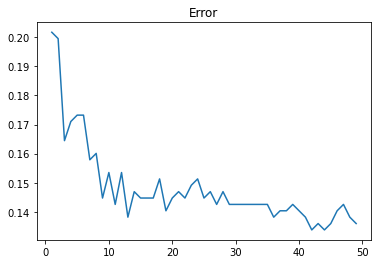

In [145]:
plt.plot(range(1,50),error)
plt.title("Error")
plt.show()

In [146]:
model_KNN_7=KNeighborsClassifier(n_neighbors=9)

In [147]:
param_grid_7={
    "weights":["distance","uniform"],
    "metric":["minkowski","chebyshev","euclidean"],
    "p":[1,2],
    "leaf_size":(20,40,10)
}

In [148]:
gird_search_KNN_7=GridSearchCV(estimator=model_KNN_7,param_grid=param_grid_7,cv=10)

In [149]:
gird_search_KNN_7.fit(x_trains,train_labels)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'leaf_size': (20, 40, 10),
                         'metric': ['minkowski', 'chebyshev', 'euclidean'],
                         'p': [1, 2], 'weights': ['distance', 'uniform']})

In [150]:
gird_search_KNN_7.best_params_

{'leaf_size': 10, 'metric': 'chebyshev', 'p': 1, 'weights': 'uniform'}

In [151]:
best_grid_KNN_7=gird_search_KNN_7.best_estimator_

In [152]:
best_grid_KNN_7.score(x_trains,train_labels)

0.8407163053722903

In [153]:
best_grid_KNN_7.score(x_tests,test_labels)

0.8574561403508771

In [154]:
ytrain_predict_KNN_7=best_grid_KNN_7.predict(x_trains)
ytest_predict_KNN_7=best_grid_KNN_7.predict(x_tests)

**Naive Bayes Model**

In [155]:
model_NB_8=GaussianNB()

In [156]:
param_grid_8={
    "var_smoothing":np.logspace(0,-9, num=100)
}

In [157]:
gird_search_NB_8=GridSearchCV(estimator=model_NB_8,param_grid=param_grid_8,cv=10)

In [158]:
gird_search_NB_8.fit(x_train,train_labels)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [159]:
gird_search_NB_8.best_params_

{'var_smoothing': 0.0005336699231206307}

In [160]:
best_grid_NB_8=gird_search_NB_8.best_estimator_

In [161]:
best_grid_NB_8.score(x_train,train_labels)

0.824693685202639

In [162]:
best_grid_NB_8.score(x_test,test_labels)

0.8618421052631579

In [163]:
np.logspace(0,-9, num=100)

array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00000000e-05,
      

In [164]:
ytrain_predict_NB_8=best_grid_NB_8.predict(x_train)
ytest_predict_NB_8=best_grid_NB_8.predict(x_test)

**Bagging using Random Forest**

In [165]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [166]:
rfcl_9=RandomForestClassifier(random_state=1,max_features=5)

In [167]:
model_bgcl_9=BaggingClassifier(base_estimator=rfcl_9,n_estimators=75,random_state=1)

In [168]:
model_bgcl_9=model_bgcl_9.fit(x_train,train_labels)

In [169]:
model_bgcl_9.score(x_train,train_labels)

0.9613572101790764

In [170]:
model_bgcl_9.score(x_test,test_labels)

0.8464912280701754

In [171]:
ytrain_predict_bgcl_9=model_bgcl_9.predict(x_train)
ytest_predict_bgcl_9=model_bgcl_9.predict(x_test)

**Boosting using Ada Boost classifier**

In [172]:
#importing necessary libraries
from sklearn.ensemble import AdaBoostClassifier

In [173]:
model_abcl_10=AdaBoostClassifier(base_estimator=rfcl_9,n_estimators=51,random_state=1)

In [174]:
model_abcl_10=model_abcl_10.fit(x_train,train_labels)

In [175]:
model_abcl_10.score(x_train,train_labels)

1.0

In [176]:
model_abcl_10.score(x_test,test_labels)

0.8442982456140351

In [177]:
ytrain_predict_abcl_10=model_abcl_10.predict(x_train)
ytest_predict_abcl_10=model_abcl_10.predict(x_test)

**Ada Boosting with default values without any parameters**

In [178]:
model_abcl_11=AdaBoostClassifier()

In [179]:
model_abcl_11=model_abcl_11.fit(x_train,train_labels)

In [180]:
model_abcl_11.score(x_train,train_labels)

0.8397737983034873

In [181]:
model_abcl_11.score(x_test,test_labels)

0.8355263157894737

In [182]:
ytest_predict_abcl_11=model_abcl_11.predict(x_test)
ytrain_predict_abcl_11=model_abcl_11.predict(x_train)

**Boosting using Gradient Boost Classifier**

In [183]:
#importing necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
model_gbcl_12=GradientBoostingClassifier(n_estimators=75,random_state=1)

In [185]:
model_gbcl_12=model_gbcl_12.fit(x_train,train_labels)

In [186]:
model_gbcl_12.score(x_train,train_labels)

0.8755890669180019

In [187]:
model_gbcl_12.score(x_test,test_labels)

0.8464912280701754

In [188]:
ytest_predict_gbcl_12=model_gbcl_12.predict(x_test)
ytrain_predict_gbcl_12=model_gbcl_12.predict(x_train)

**Using Smote to bring down the imbalance in the dataset**

In [189]:
#importing necessary libraries
from imblearn.over_sampling import SMOTE

In [190]:
smote=SMOTE(random_state=1)

In [191]:
x.shape

(1517, 9)

In [192]:
y.value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [193]:
x_train_1,train_labels_1=smote.fit_resample(x_train,train_labels.ravel())

In [194]:
x.shape

(1517, 9)

In [195]:
y.value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [196]:
x_train_1.shape

(1478, 9)

In [197]:
ytrain_b = train_labels.copy()

In [198]:
ytrain_b.value_counts()

1    739
0    322
Name: vote, dtype: int64

In [199]:
y_train_1b = pd.DataFrame(train_labels_1)

In [200]:
y_train_1b.value_counts()

0    739
1    739
dtype: int64

**Logistic Regression with SMOTE**

In [201]:
#Giving parameter grid for using GridSearchCV
param_grid_13={
    "penalty":["l2","none"],
    "solver":["sag","lbfgs","newton-cg"],
    "tol":[0.0001,0.00001,0.001]
}

In [202]:
# Logistic Regression Model Creation
model_lr_13 = LogisticRegression(max_iter=1000,n_jobs=2)

In [203]:
grid_search_13=GridSearchCV(estimator=model_lr_13,param_grid=param_grid_13,cv=10)

In [204]:
#Fitting the training data in the model
grid_search_13.fit(x_train_1,train_labels_1)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000, n_jobs=2),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05, 0.001]})

In [205]:
#Finding out best parameters
grid_search_13.best_params_

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

In [206]:
best_grid_lr_13=grid_search_13.best_estimator_

In [207]:
best_grid_lr_13.score(x_train_1,train_labels_1)

0.8396481732070366

In [208]:
best_grid_lr_13.score(x_test,test_labels)

0.8442982456140351

In [209]:
ytrain_predict_lr_13=best_grid_lr_13.predict(x_train_1)
ytest_predict_lr_13=best_grid_lr_13.predict(x_test)

**Linear Discriminan Analysis with SMOTE**

In [210]:
model_lda_14=LinearDiscriminantAnalysis()

In [211]:
#Giving parameter grid for using GridSearchCV
param_grid_14={
    "solver":["svd","lsqr","eigen"],
    "shrinkage":["auto","float","None"],
    "tol":[0.0001,0.00001,0.001]
}

In [212]:
grid_search_lda_14=GridSearchCV(estimator=model_lda_14,param_grid=param_grid_14,cv=10)

In [213]:
#Fitting the training data in the model
grid_search_lda_14.fit(x_train_1, train_labels_1)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05, 0.001]})

In [214]:
#Finding out best parameters
grid_search_lda_14.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [215]:
best_grid_lda_14=grid_search_lda_14.best_estimator_

In [216]:
best_grid_lda_14.score(x_train_1,train_labels_1)

0.8389715832205683

In [217]:
best_grid_lda_14.score(x_test,test_labels)

0.8377192982456141

In [218]:
ytrain_predict_lda_14=best_grid_lda_14.predict(x_train_1)
ytest_predict_lda_14=best_grid_lda_14.predict(x_test)

**KNN with SMOTE**

As KNN works better on scaled data, let us scale our dataset.

In [219]:
#Scaling the Train and test data
x_trains_1=pd.DataFrame(sc.fit_transform(x_train_1))

In [220]:
x_trains_1.columns=columns

In [221]:
x_trains_1.head()

age  economic_cond_national  economic_cond_household     Blair  \
0  1.032717               -0.062628                 0.055870  0.750112   
1  0.136029                1.052608                 2.146388  0.750112   
2 -1.977593               -0.062628                 1.101129 -0.927143   
3 -0.760659                1.052608                 1.101129 -0.927143   
4 -1.144954               -0.062628                -0.989390  0.750112   

      Hague    Europe  political_knowledge  gender_female  gender_male  
0 -0.842055  1.207124            -1.516355       1.004068    -0.825504  
1 -1.688692 -1.339359             0.445284       1.004068    -0.825504  
2  0.851220  1.207124            -1.516355      -0.995949     1.211382  
3  0.004583 -0.702738            -1.516355      -0.995949     1.211382  
4 -0.842055 -0.066117             0.445284      -0.995949     1.211382

In [222]:
scores_15=[]

In [223]:
for k in range(1,50):
    model_KNN=KNeighborsClassifier(n_neighbors=k,weights="distance")
    model_KNN.fit(x_trains_1,train_labels_1)
    scores_15.append(model_KNN.score(x_tests,test_labels))

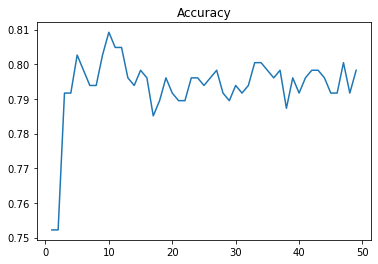

In [224]:
plt.plot(range(1,50),scores_15)
plt.title("Accuracy")
plt.show()

In [225]:
error_15=[]

In [226]:
for k in range(1,50):
    model_KNN=KNeighborsClassifier(n_neighbors=k,weights="distance")
    model_KNN.fit(x_trains_1,train_labels_1)
    error_15.append(1-(model_KNN.score(x_tests,test_labels)))

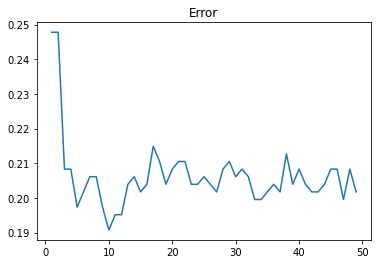

In [227]:
plt.plot(range(1,50),error_15)
plt.title("Error")
plt.show()

In [228]:
model_KNN_15=KNeighborsClassifier(n_neighbors=9)

In [229]:
param_grid_15={
    "weights":["distance","uniform"],
    "metric":["minkowski","chebyshev","euclidean"],
    "p":[1,2],
    "leaf_size":(20,40,10)
}

In [230]:
gird_search_KNN_15=GridSearchCV(estimator=model_KNN_15,param_grid=param_grid_15,cv=10)

In [231]:
gird_search_KNN_15.fit(x_trains_1,train_labels_1)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'leaf_size': (20, 40, 10),
                         'metric': ['minkowski', 'chebyshev', 'euclidean'],
                         'p': [1, 2], 'weights': ['distance', 'uniform']})

In [232]:
gird_search_KNN_15.best_params_

{'leaf_size': 20, 'metric': 'minkowski', 'p': 1, 'weights': 'distance'}

In [233]:
best_grid_KNN_15=gird_search_KNN_7.best_estimator_

In [234]:
best_grid_KNN_15.score(x_trains_1,train_labels_1)

0.7611637347767253

In [235]:
best_grid_KNN_15.score(x_tests,test_labels)

0.8574561403508771

In [236]:
ytrain_predict_KNN_15=best_grid_KNN_15.predict(x_trains_1)
ytest_predict_KNN_15=best_grid_KNN_15.predict(x_tests)

**Naive Bayes with SMOTE**

In [237]:
model_NB_16=GaussianNB()

In [238]:
param_grid_16={
    "var_smoothing":np.logspace(0,-9, num=100)
}

In [239]:
gird_search_NB_16=GridSearchCV(estimator=model_NB_16,param_grid=param_grid_16,cv=10)

In [240]:
gird_search_NB_16.fit(x_train_1,train_labels_1)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [241]:
gird_search_NB_16.best_params_

{'var_smoothing': 0.001}

In [242]:
best_grid_NB_16=gird_search_NB_16.best_estimator_

In [243]:
best_grid_NB_16.score(x_train_1,train_labels_1)

0.8274695534506089

In [244]:
best_grid_NB_16.score(x_test,test_labels)

0.831140350877193

In [245]:
ytrain_predict_NB_16=best_grid_NB_16.predict(x_train_1)
ytest_predict_NB_16=best_grid_NB_16.predict(x_test)

**Bagging with SMOTE**

In [246]:
rfcl_17=RandomForestClassifier(random_state=1,max_features=5)

In [247]:
model_bgcl_17=BaggingClassifier(base_estimator=rfcl_17,n_estimators=75,random_state=1)

In [248]:
model_bgcl_17=model_bgcl_17.fit(x_train_1,train_labels_1)

In [249]:
model_bgcl_17.score(x_train_1,train_labels_1)

0.9675236806495264

In [250]:
model_bgcl_17.score(x_test,test_labels)

0.8355263157894737

In [251]:
ytrain_predict_bgcl_17=model_bgcl_17.predict(x_train_1)
ytest_predict_bgcl_17=model_bgcl_17.predict(x_test)

**Ada Boosting with random forest base model with SMOTE**

In [252]:
model_abcl_18=AdaBoostClassifier(base_estimator=rfcl_17,n_estimators=51,random_state=1)

In [253]:
model_abcl_18=model_abcl_18.fit(x_train_1,train_labels_1)

In [254]:
model_abcl_18.score(x_train_1,train_labels_1)

0.9993234100135318

In [255]:
model_abcl_18.score(x_test,test_labels)

0.8355263157894737

In [256]:
ytrain_predict_abcl_18=model_abcl_18.predict(x_train_1)
ytest_predict_abcl_18=model_abcl_18.predict(x_test)

**Ada Boosting without base model with SMOTE**

In [257]:
model_abcl_19=AdaBoostClassifier()

In [258]:
model_abcl_19=model_abcl_19.fit(x_train_1,train_labels_1)

In [259]:
model_abcl_19.score(x_train_1,train_labels_1)

0.8633288227334236

In [260]:
model_abcl_19.score(x_test,test_labels)

0.831140350877193

In [261]:
ytest_predict_abcl_19=model_abcl_19.predict(x_test)
ytrain_predict_abcl_19=model_abcl_19.predict(x_train_1)

**Gradient Boosting with SMOTE**

In [262]:
model_gbcl_20=GradientBoostingClassifier(n_estimators=75,random_state=1)

In [263]:
model_gbcl_20=model_gbcl_20.fit(x_train_1,train_labels_1)

In [264]:
model_gbcl_20.score(x_train_1,train_labels_1)

0.8944519621109608

In [265]:
model_gbcl_20.score(x_test,test_labels)

0.8245614035087719

In [266]:
ytest_predict_gbcl_20=model_gbcl_20.predict(x_test)
ytrain_predict_gbcl_20=model_gbcl_20.predict(x_train_1)

**1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)**

In [267]:
from sklearn.metrics import confusion_matrix, classification_report

In [268]:
# importing AUC and ROC curve for model evaluating
from sklearn.metrics import roc_auc_score, roc_curve

**Model 1 - Logistic Regression**

Accuacy

In [269]:
print("Training Data",round(model_lr_1.score(x_train,train_labels),3))
print("Testing Data",round(model_lr_1.score(x_test,test_labels),3))

Training Data 0.828
Testing Data 0.855


Confusion Matrix

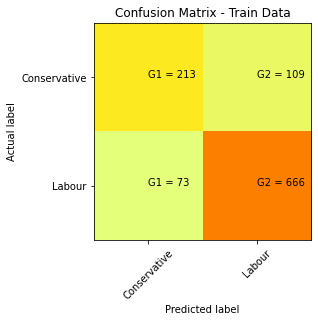

In [270]:
cm = confusion_matrix(train_labels, ytrain_predict_lr_1)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

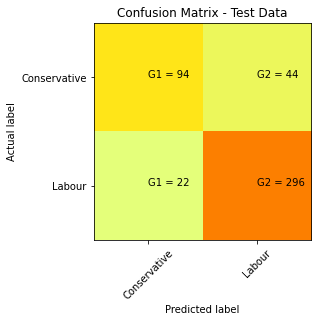

In [271]:
cm = confusion_matrix(test_labels, ytest_predict_lr_1)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification report

In [272]:
print(classification_report(train_labels,ytrain_predict_lr_1))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061



In [273]:
print(classification_report(test_labels,ytest_predict_lr_1))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



ROC curve and AUC

AUC: 0.877


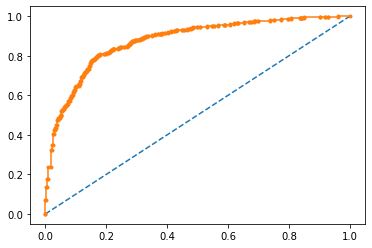

In [274]:
probs_tr_lr_1 = model_lr_1.predict_proba(x_train)
probs_tr_lr_1 = probs_tr_lr_1[:, 1]
auc_tr_lr_1 = roc_auc_score(train_labels, probs_tr_lr_1)
print('AUC: %.3f' % auc_tr_lr_1)
fpr_tr_lr_1, tpr_tr_lr_1, thresholds_tr_lr_1 = roc_curve(train_labels, probs_tr_lr_1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_lr_1, tpr_tr_lr_1, marker='.')
plt.show()

AUC: 0.913


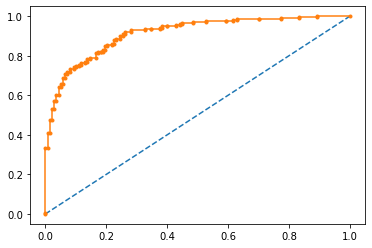

In [275]:
probs_te_lr_1 = model_lr_1.predict_proba(x_test)
probs_te_lr_1 = probs_te_lr_1[:, 1]
auc_te_lr_1 = roc_auc_score(test_labels, probs_te_lr_1)
print('AUC: %.3f' % auc_te_lr_1)
fpr_te_lr_1, tpr_te_lr_1, thresholds_te_lr_1 = roc_curve(test_labels, probs_te_lr_1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_lr_1, tpr_te_lr_1, marker='.')
plt.show()

**Model 2 - Linear Discriminant Analysis**

Accuracy

In [276]:
print("Training Data",round(model_lda_2.score(x_train,train_labels),3))
print("Testing Data",round(model_lda_2.score(x_test,test_labels),3))

Training Data 0.823
Testing Data 0.853


Confusion Matrix

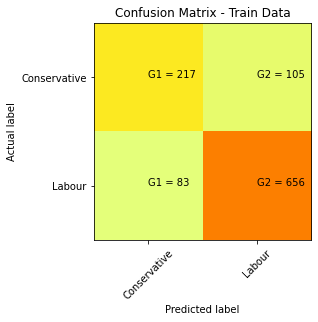

In [277]:
cm = confusion_matrix(train_labels, ytrain_predict_lda_2)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

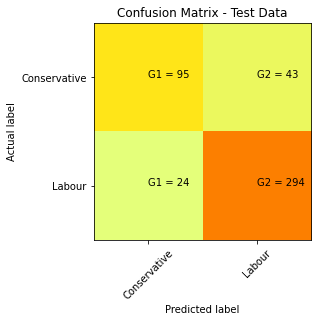

In [278]:
cm = confusion_matrix(test_labels, ytest_predict_lda_2)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [279]:
print(classification_report(train_labels,ytrain_predict_lda_2))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [280]:
print(classification_report(test_labels,ytest_predict_lda_2))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



ROC Curve and AUC score

AUC: 0.877


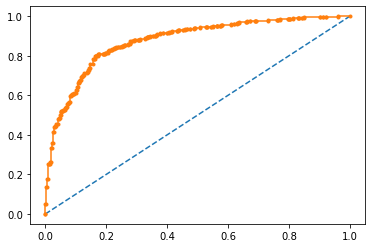

In [281]:
probs_tr_lda_2 = model_lda_2.predict_proba(x_train)
probs_tr_lda_2 = probs_tr_lda_2[:, 1]
auc_tr_lda_2 = roc_auc_score(train_labels, probs_tr_lda_2)
print('AUC: %.3f' % auc_tr_lda_2)
fpr_tr_lda_2, tpr_tr_lda_2, thresholds_tr_lda_2 = roc_curve(train_labels, probs_tr_lda_2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_lda_2, tpr_tr_lda_2, marker='.')
plt.show()

AUC: 0.914


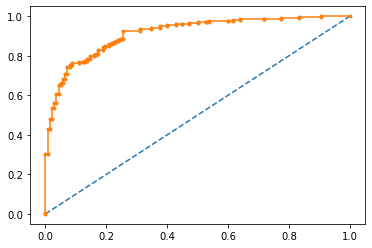

In [282]:
probs_te_lda_2 = model_lda_2.predict_proba(x_test)
probs_te_lda_2 = probs_te_lda_2[:, 1]
auc_te_lda_2 = roc_auc_score(test_labels, probs_te_lda_2)
print('AUC: %.3f' % auc_te_lda_2)
fpr_te_lda_2, tpr_te_lda_2, thresholds_te_lda_2 = roc_curve(test_labels, probs_te_lda_2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_lda_2, tpr_te_lda_2, marker='.')
plt.show()

**Model 3 - Naive Bayes**

Accuracy

In [283]:
print("Training Data",round(model_NB_3.score(x_train,train_labels),3))
print("Testing Data",round(model_NB_3.score(x_test,test_labels),3))

Training Data 0.82
Testing Data 0.86


Confusion Matrix

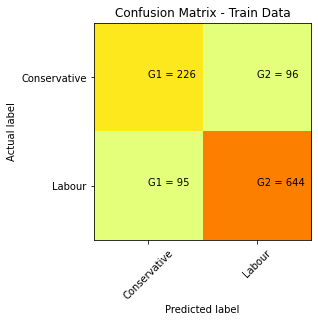

In [284]:
cm = confusion_matrix(train_labels, ytrain_predict_NB_3)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

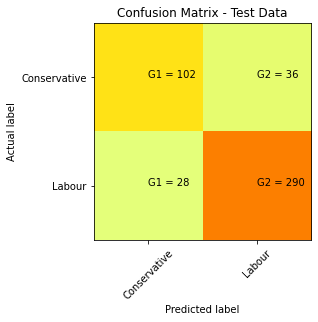

In [285]:
cm = confusion_matrix(test_labels, ytest_predict_NB_3)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Reprot

In [286]:
print(classification_report(train_labels,ytrain_predict_NB_3))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [287]:
print(classification_report(test_labels,ytest_predict_NB_3))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       138
           1       0.89      0.91      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.83      0.83       456
weighted avg       0.86      0.86      0.86       456



ROC Curve and AUC score

AUC: 0.873


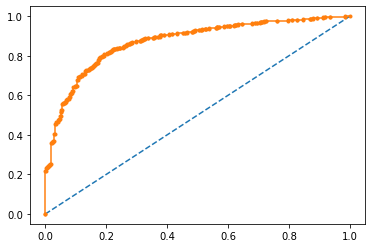

In [288]:
probs_tr_NB_3 = model_NB_3.predict_proba(x_train)
probs_tr_NB_3 = probs_tr_NB_3[:, 1]
auc_tr_NB_3 = roc_auc_score(train_labels, probs_tr_NB_3)
print('AUC: %.3f' % auc_tr_NB_3)
fpr_tr_NB_3, tpr_tr_NB_3, thresholds_tr_NB_3 = roc_curve(train_labels, probs_tr_NB_3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_NB_3, tpr_tr_NB_3, marker='.')
plt.show()

AUC: 0.913


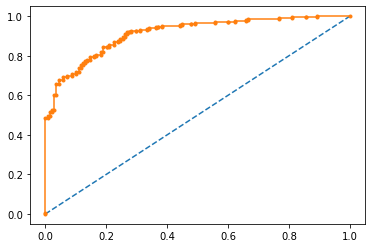

In [289]:
probs_te_NB_3 = model_NB_3.predict_proba(x_test)
probs_te_NB_3 = probs_te_NB_3[:, 1]
auc_te_NB_3 = roc_auc_score(test_labels, probs_te_NB_3)
print('AUC: %.3f' % auc_te_NB_3)
fpr_te_NB_3, tpr_te_NB_3, thresholds_te_NB_3 = roc_curve(test_labels, probs_te_NB_3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_NB_3, tpr_te_NB_3, marker='.')
plt.show()

**Model 4 - KNN model**

Accuracy

In [290]:
print("Training Data",round(model_KNN_4.score(x_trains,train_labels),3))
print("Testing Data",round(model_KNN_4.score(x_tests,test_labels),3))

Training Data 0.862
Testing Data 0.838


Confusion Matrix

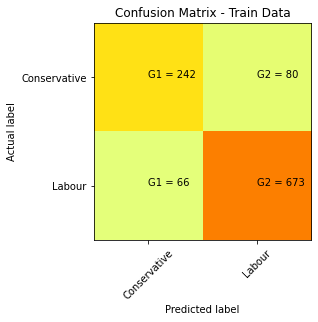

In [291]:
cm = confusion_matrix(train_labels, ytrain_predict_KNN_4)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

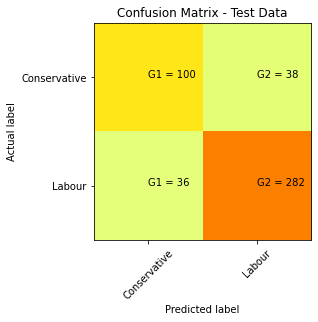

In [292]:
cm = confusion_matrix(test_labels, ytest_predict_KNN_4)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [293]:
print(classification_report(train_labels,ytrain_predict_KNN_4))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       322
           1       0.89      0.91      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.83      0.84      1061
weighted avg       0.86      0.86      0.86      1061



In [294]:
print(classification_report(test_labels,ytest_predict_KNN_4))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       138
           1       0.88      0.89      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



ROC Curve and AUC score

AUC: 0.926


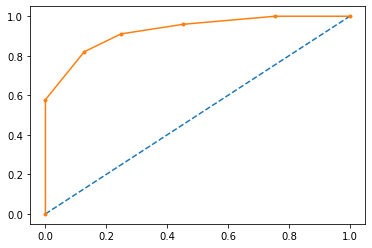

In [295]:
probs_tr_KNN_4 = model_KNN_4.predict_proba(x_trains)
probs_tr_KNN_4 = probs_tr_KNN_4[:, 1]
auc_tr_KNN_4 = roc_auc_score(train_labels, probs_tr_KNN_4)
print('AUC: %.3f' % auc_tr_KNN_4)
fpr_tr_KNN_4, tpr_tr_KNN_4, thresholds_tr_KNN_4 = roc_curve(train_labels, probs_tr_KNN_4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_KNN_4, tpr_tr_KNN_4, marker='.')
plt.show()

AUC: 0.860


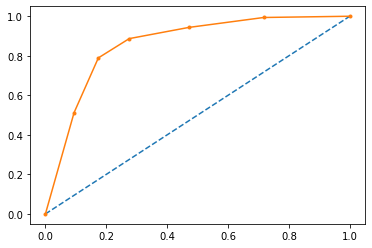

In [296]:
probs_te_KNN_4 = model_KNN_4.predict_proba(x_tests)
probs_te_KNN_4 = probs_te_KNN_4[:, 1]
auc_te_KNN_4 = roc_auc_score(test_labels, probs_te_KNN_4)
print('AUC: %.3f' % auc_te_KNN_4)
fpr_te_KNN_4, tpr_te_KNN_4, thresholds_te_KNN_4 = roc_curve(test_labels, probs_te_KNN_4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_KNN_4, tpr_te_KNN_4, marker='.')
plt.show()

**Model 5 - Logistic Regression Model tuned**

Accuracy

In [297]:
print("Training Data",round(best_grid_lr_5.score(x_train,train_labels),3))
print("Testing Data",round(best_grid_lr_5.score(x_test,test_labels),3))

Training Data 0.828
Testing Data 0.862


Confusion Matrix

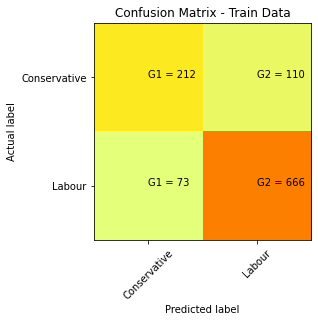

In [298]:
cm = confusion_matrix(train_labels, ytrain_predict_lr_5)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

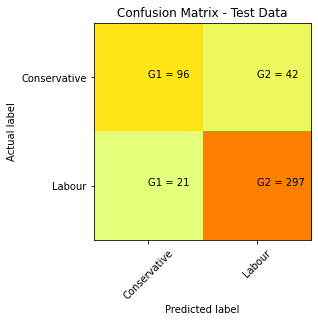

In [299]:
cm = confusion_matrix(test_labels, ytest_predict_lr_5)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [300]:
print(classification_report(train_labels,ytrain_predict_lr_5))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [301]:
print(classification_report(test_labels,ytest_predict_lr_5))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       138
           1       0.88      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.85      0.81      0.83       456
weighted avg       0.86      0.86      0.86       456



ROC Curve and AUC score

AUC: 0.877


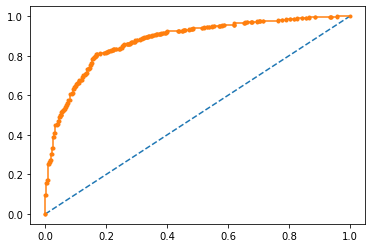

In [302]:
probs_tr_lr_5 = best_grid_lr_5.predict_proba(x_train)
probs_tr_lr_5 = probs_tr_lr_5[:, 1]
auc_tr_lr_5 = roc_auc_score(train_labels, probs_tr_lr_5)
print('AUC: %.3f' % auc_tr_lr_5)
fpr_tr_lr_5, tpr_tr_lr_5, thresholds_tr_lr_5 = roc_curve(train_labels, probs_tr_lr_5)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_lr_5, tpr_tr_lr_5, marker='.')
plt.show()

AUC: 0.914


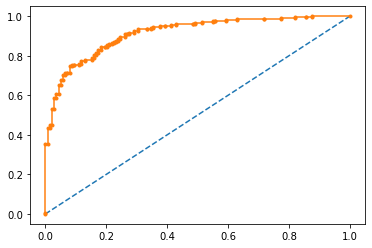

In [303]:
probs_te_lr_5 = best_grid_lr_5.predict_proba(x_test)
probs_te_lr_5 = probs_te_lr_5[:, 1]
auc_te_lr_5 = roc_auc_score(test_labels, probs_te_lr_5)
print('AUC: %.3f' % auc_te_lr_5)
fpr_te_lr_5, tpr_te_lr_5, thresholds_te_lr_5 = roc_curve(test_labels, probs_te_lr_5)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_lr_5, tpr_te_lr_5, marker='.')
plt.show()

**Model 6 - Linear Discriminant Analysis with tuning**

Accuracy

In [304]:
print("Training Data",round(best_grid_lda_6.score(x_train,train_labels),3))
print("Testing Data",round(best_grid_lda_6.score(x_test,test_labels),3))

Training Data 0.824
Testing Data 0.857


Confusion Matrix

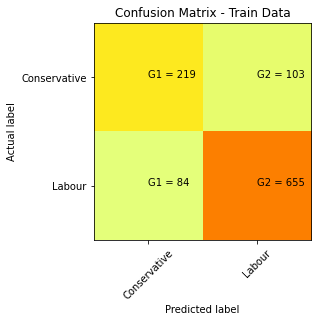

In [305]:
cm = confusion_matrix(train_labels, ytrain_predict_lda_6)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

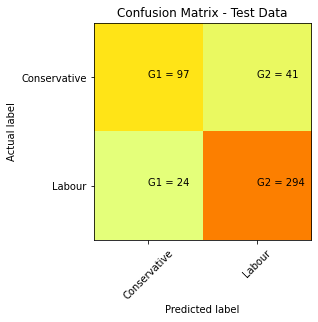

In [306]:
cm = confusion_matrix(test_labels, ytest_predict_lda_6)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classificaion Report

In [307]:
print(classification_report(train_labels,ytrain_predict_lda_6))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       322
           1       0.86      0.89      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [308]:
print(classification_report(test_labels,ytest_predict_lda_6))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



ROC Curve and AUC score

AUC: 0.877


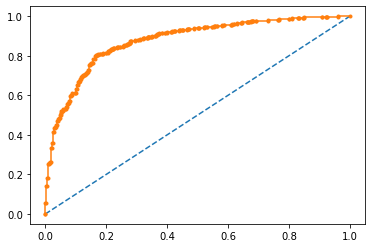

In [309]:
probs_tr_lda_6 = best_grid_lda_6.predict_proba(x_train)
probs_tr_lda_6 = probs_tr_lda_6[:, 1]
auc_tr_lda_6 = roc_auc_score(train_labels, probs_tr_lda_6)
print('AUC: %.3f' % auc_tr_lda_6)
fpr_tr_lda_6, tpr_tr_lda_6, thresholds_tr_lda_6 = roc_curve(train_labels, probs_tr_lda_6)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_lda_6, tpr_tr_lda_6, marker='.')
plt.show()

AUC: 0.915


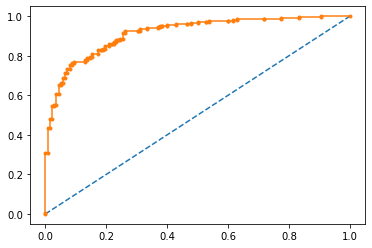

In [310]:
probs_te_lda_6 = best_grid_lda_6.predict_proba(x_test)
probs_te_lda_6 = probs_te_lda_6[:, 1]
auc_te_lda_6 = roc_auc_score(test_labels, probs_te_lda_6)
print('AUC: %.3f' % auc_te_lda_6)
fpr_te_lda_6, tpr_te_lda_6, thresholds_te_lda_6 = roc_curve(test_labels, probs_te_lda_6)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_lda_6, tpr_te_lda_6, marker='.')
plt.show()

**Model 7 - KNN with tuning**

Accuracy

In [311]:
print("Training Data",round(best_grid_KNN_7.score(x_trains,train_labels),3))
print("Testing Data",round(best_grid_KNN_7.score(x_tests,test_labels),3))

Training Data 0.841
Testing Data 0.857


Confusion Matrix

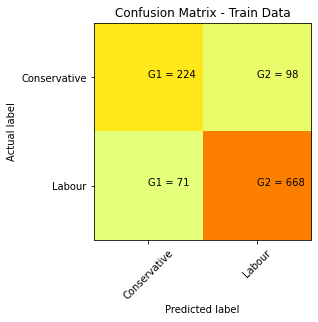

In [312]:
cm = confusion_matrix(train_labels, ytrain_predict_KNN_7)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

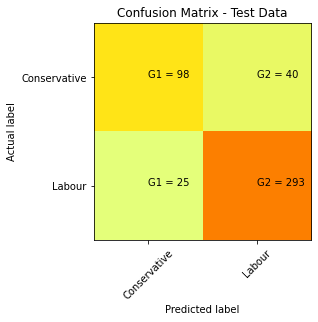

In [313]:
cm = confusion_matrix(test_labels, ytest_predict_KNN_7)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [314]:
print(classification_report(train_labels,ytrain_predict_KNN_7))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       322
           1       0.87      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [315]:
print(classification_report(test_labels,ytest_predict_KNN_7))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.86      0.86       456



ROC Curve and AUC score

AUC: 0.911


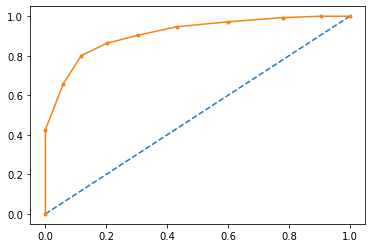

In [316]:
probs_tr_KNN_7 = best_grid_KNN_7.predict_proba(x_trains)
probs_tr_KNN_7 = probs_tr_KNN_7[:, 1]
auc_tr_KNN_7 = roc_auc_score(train_labels, probs_tr_KNN_7)
print('AUC: %.3f' % auc_tr_KNN_7)
fpr_tr_KNN_7, tpr_tr_KNN_7, thresholds_tr_KNN_7 = roc_curve(train_labels, probs_tr_KNN_7)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_KNN_7, tpr_tr_KNN_7, marker='.')
plt.show()

AUC: 0.889


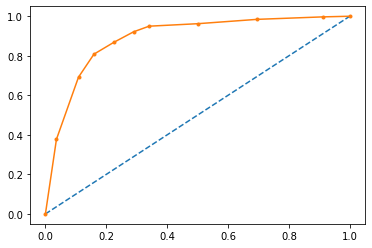

In [317]:
probs_te_KNN_7 = best_grid_KNN_7.predict_proba(x_tests)
probs_te_KNN_7 = probs_te_KNN_7[:, 1]
auc_te_KNN_7 = roc_auc_score(test_labels, probs_te_KNN_7)
print('AUC: %.3f' % auc_te_KNN_7)
fpr_te_KNN_7, tpr_te_KNN_7, thresholds_te_KNN_7 = roc_curve(test_labels, probs_te_KNN_7)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_KNN_7, tpr_te_KNN_7, marker='.')
plt.show()

**Model 8 - Naive Bayes with tuning**

Accuracy

In [318]:
print("Training Data",round(best_grid_NB_8.score(x_train,train_labels),3))
print("Testing Data",round(best_grid_NB_8.score(x_test,test_labels),3))

Training Data 0.825
Testing Data 0.862


Confusion Matrix

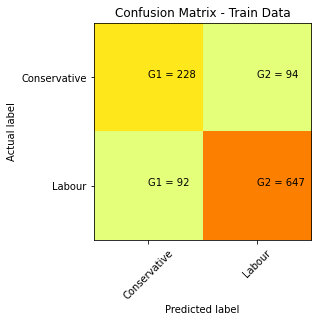

In [319]:
cm = confusion_matrix(train_labels, ytrain_predict_NB_8)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

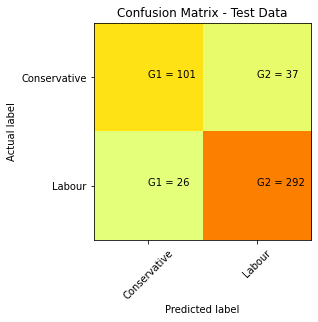

In [320]:
cm = confusion_matrix(test_labels, ytest_predict_NB_8)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [321]:
print(classification_report(train_labels,ytrain_predict_NB_8))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       322
           1       0.87      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [322]:
print(classification_report(test_labels,ytest_predict_NB_8))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       138
           1       0.89      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.83      0.83       456
weighted avg       0.86      0.86      0.86       456



ROC Curve and AUC score

AUC: 0.873


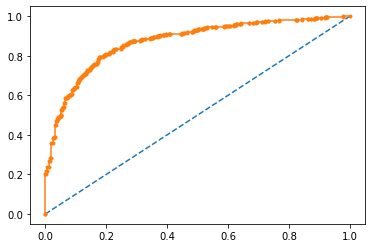

In [323]:
probs_tr_NB_8 = best_grid_NB_8.predict_proba(x_train)
probs_tr_NB_8 = probs_tr_NB_8[:, 1]
auc_tr_NB_8 = roc_auc_score(train_labels, probs_tr_NB_8)
print('AUC: %.3f' % auc_tr_NB_8)
fpr_tr_NB_8, tpr_tr_NB_8, thresholds_tr_NB_8 = roc_curve(train_labels, probs_tr_NB_8)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_NB_8, tpr_tr_NB_8, marker='.')
plt.show()

AUC: 0.913


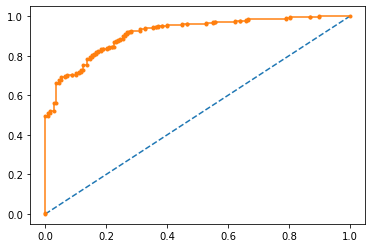

In [324]:
probs_te_NB_8 = best_grid_NB_8.predict_proba(x_test)
probs_te_NB_8 = probs_te_NB_8[:, 1]
auc_te_NB_8 = roc_auc_score(test_labels, probs_te_NB_8)
print('AUC: %.3f' % auc_te_NB_8)
fpr_te_NB_8, tpr_te_NB_8, thresholds_te_NB_8 = roc_curve(test_labels, probs_te_NB_8)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_NB_8, tpr_te_NB_8, marker='.')
plt.show()

**Model 9 - Bagging using Random Forest**

Accuracy

In [325]:
print("Training Data",round(model_bgcl_9.score(x_train,train_labels),3))
print("Testing Data",round(model_bgcl_9.score(x_test,test_labels),3))

Training Data 0.961
Testing Data 0.846


Confusion Matrix

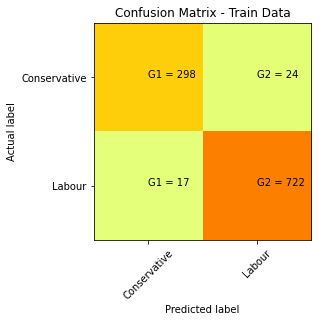

In [326]:
cm = confusion_matrix(train_labels, ytrain_predict_bgcl_9)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

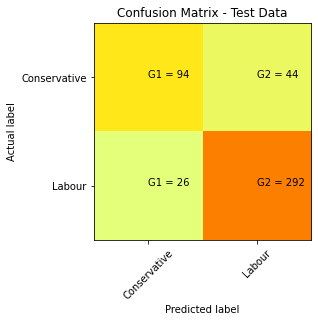

In [327]:
cm = confusion_matrix(test_labels, ytest_predict_bgcl_9)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [328]:
print(classification_report(train_labels,ytrain_predict_bgcl_9))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       322
           1       0.97      0.98      0.97       739

    accuracy                           0.96      1061
   macro avg       0.96      0.95      0.95      1061
weighted avg       0.96      0.96      0.96      1061



In [329]:
print(classification_report(test_labels,ytest_predict_bgcl_9))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       138
           1       0.87      0.92      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.85      0.84       456



ROC Curve and AUC score

AUC: 0.996


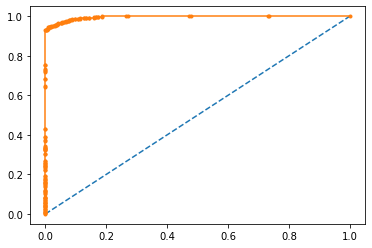

In [330]:
probs_tr_bgcl_9 = model_bgcl_9.predict_proba(x_train)
probs_tr_bgcl_9 = probs_tr_bgcl_9[:, 1]
auc_tr_bgcl_9 = roc_auc_score(train_labels, probs_tr_bgcl_9)
print('AUC: %.3f' % auc_tr_bgcl_9)
fpr_tr_bgcl_9, tpr_tr_bgcl_9, thresholds_tr_bgcl_9 = roc_curve(train_labels, probs_tr_bgcl_9)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_bgcl_9, tpr_tr_bgcl_9, marker='.')
plt.show()

AUC: 0.908


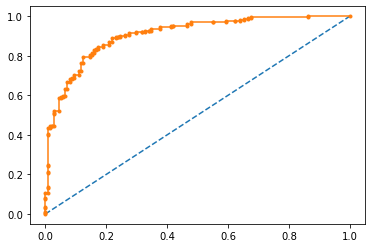

In [331]:
probs_te_bgcl_9 = model_bgcl_9.predict_proba(x_test)
probs_te_bgcl_9 = probs_te_bgcl_9[:, 1]
auc_te_bgcl_9 = roc_auc_score(test_labels, probs_te_bgcl_9)
print('AUC: %.3f' % auc_te_bgcl_9)
fpr_te_bgcl_9, tpr_te_bgcl_9, thresholds_te_bgcl_9 = roc_curve(test_labels, probs_te_bgcl_9)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_bgcl_9, tpr_te_bgcl_9, marker='.')
plt.show()

**Model 10 - AdaBoost with Random Forest Base model**

Accuracy

In [332]:
print("Training Data",round(model_abcl_10.score(x_train,train_labels),3))
print("Testing Data",round(model_abcl_10.score(x_test,test_labels),3))

Training Data 1.0
Testing Data 0.844


Confusion Matrix

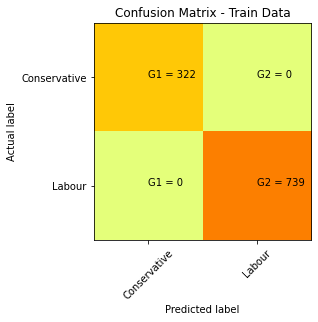

In [333]:
cm = confusion_matrix(train_labels, ytrain_predict_abcl_10)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

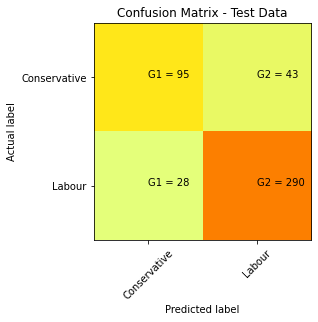

In [334]:
cm = confusion_matrix(test_labels, ytest_predict_abcl_10)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [335]:
print(classification_report(train_labels,ytrain_predict_abcl_10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [336]:
print(classification_report(test_labels,ytest_predict_abcl_10))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



ROC Curve and AUC score

AUC: 1.000


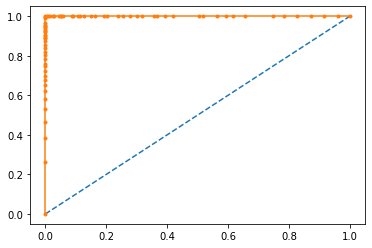

In [337]:
probs_tr_abcl_10 = model_abcl_10.predict_proba(x_train)
probs_tr_abcl_10 = probs_tr_abcl_10[:, 1]
auc_tr_abcl_10 = roc_auc_score(train_labels, probs_tr_abcl_10)
print('AUC: %.3f' % auc_tr_abcl_10)
fpr_tr_abcl_10, tpr_tr_abcl_10, thresholds_tr_abcl_10 = roc_curve(train_labels, probs_tr_abcl_10)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_abcl_10, tpr_tr_abcl_10, marker='.')
plt.show()

AUC: 0.888


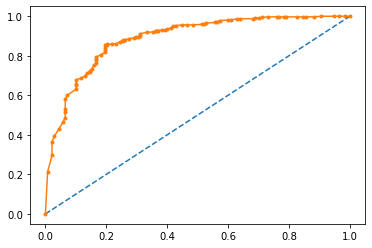

In [338]:
probs_te_abcl_10 = model_abcl_10.predict_proba(x_test)
probs_te_abcl_10 = probs_te_abcl_10[:, 1]
auc_te_abcl_10 = roc_auc_score(test_labels, probs_te_abcl_10)
print('AUC: %.3f' % auc_te_abcl_10)
fpr_te_abcl_10, tpr_te_abcl_10, thresholds_te_abcl_10 = roc_curve(test_labels, probs_te_abcl_10)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_abcl_10, tpr_te_abcl_10, marker='.')
plt.show()

**Model 11 - Ada boost without base model**

Accuracy

In [339]:
print("Training Data",round(model_abcl_11.score(x_train,train_labels),3))
print("Testing Data",round(model_abcl_11.score(x_test,test_labels),3))

Training Data 0.84
Testing Data 0.836


Confusion Matrix

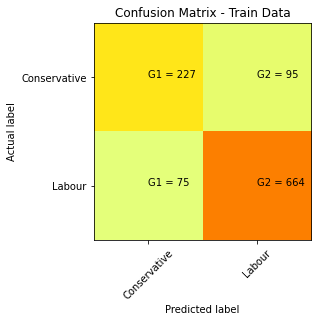

In [340]:
cm = confusion_matrix(train_labels, ytrain_predict_abcl_11)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

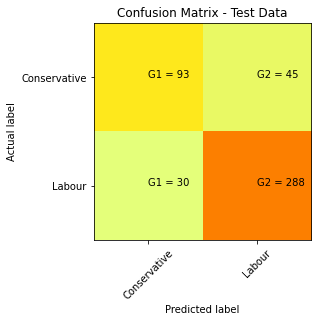

In [341]:
cm = confusion_matrix(test_labels, ytest_predict_abcl_11)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [342]:
print(classification_report(train_labels,ytrain_predict_abcl_11))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73       322
           1       0.87      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [343]:
print(classification_report(test_labels,ytest_predict_abcl_11))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       138
           1       0.86      0.91      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



ROC Curve and AUC score

AUC: 0.900


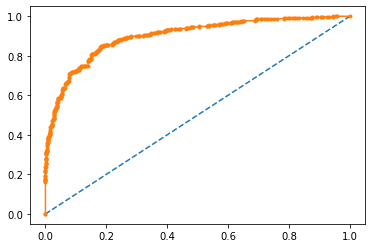

In [344]:
probs_tr_abcl_11 = model_abcl_11.predict_proba(x_train)
probs_tr_abcl_11 = probs_tr_abcl_11[:, 1]
auc_tr_abcl_11 = roc_auc_score(train_labels, probs_tr_abcl_11)
print('AUC: %.3f' % auc_tr_abcl_11)
fpr_tr_abcl_11, tpr_tr_abcl_11, thresholds_tr_abcl_11 = roc_curve(train_labels, probs_tr_abcl_11)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_abcl_11, tpr_tr_abcl_11, marker='.')
plt.show()

AUC: 0.910


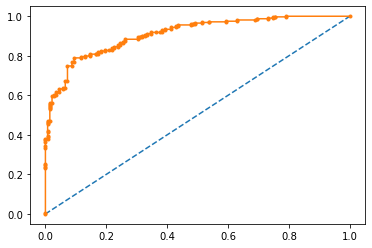

In [345]:
probs_te_abcl_11 = model_abcl_11.predict_proba(x_test)
probs_te_abcl_11 = probs_te_abcl_11[:, 1]
auc_te_abcl_11 = roc_auc_score(test_labels, probs_te_abcl_11)
print('AUC: %.3f' % auc_te_abcl_11)
fpr_te_abcl_11, tpr_te_abcl_11, thresholds_te_abcl_11 = roc_curve(test_labels, probs_te_abcl_11)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_abcl_11, tpr_te_abcl_11, marker='.')
plt.show()

**Model 12 - Gradient Boosting**

Accuracy

In [346]:
print("Training Data",round(model_gbcl_12.score(x_train,train_labels),3))
print("Testing Data",round(model_gbcl_12.score(x_test,test_labels),3))

Training Data 0.876
Testing Data 0.846


Confusion Matrix

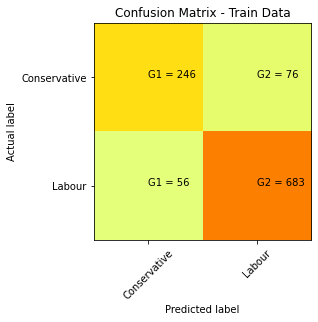

In [347]:
cm = confusion_matrix(train_labels, ytrain_predict_gbcl_12)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

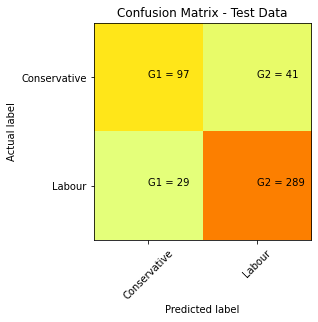

In [348]:
cm = confusion_matrix(test_labels, ytest_predict_gbcl_12)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [349]:
print(classification_report(train_labels,ytrain_predict_gbcl_12))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       322
           1       0.90      0.92      0.91       739

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.87      0.88      0.87      1061



In [350]:
print(classification_report(test_labels,ytest_predict_gbcl_12))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.85      0.84       456



ROC Curve and AUC score

AUC: 0.940


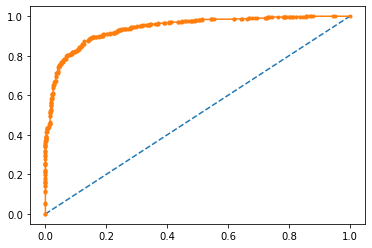

In [351]:
probs_tr_gbcl_12 = model_gbcl_12.predict_proba(x_train)
probs_tr_gbcl_12 = probs_tr_gbcl_12[:, 1]
auc_tr_gbcl_12 = roc_auc_score(train_labels, probs_tr_gbcl_12)
print('AUC: %.3f' % auc_tr_gbcl_12)
fpr_tr_gbcl_12, tpr_tr_gbcl_12, thresholds_tr_gbcl_12 = roc_curve(train_labels, probs_tr_gbcl_12)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_gbcl_12, tpr_tr_gbcl_12, marker='.')
plt.show()

AUC: 0.907


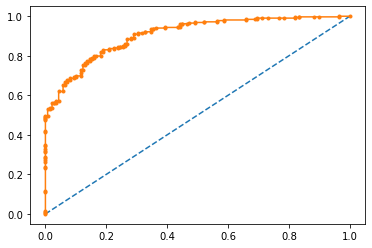

In [352]:
probs_te_gbcl_12 = model_gbcl_12.predict_proba(x_test)
probs_te_gbcl_12 = probs_te_gbcl_12[:, 1]
auc_te_gbcl_12 = roc_auc_score(test_labels, probs_te_gbcl_12)
print('AUC: %.3f' % auc_te_gbcl_12)
fpr_te_gbcl_12, tpr_te_gbcl_12, thresholds_te_gbcl_12 = roc_curve(test_labels, probs_te_gbcl_12)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_gbcl_12, tpr_te_gbcl_12, marker='.')
plt.show()

**Model 13 - Logistic Regression with SMOTE**

Accuracy

In [353]:
print("Training Data",round(best_grid_lr_13.score(x_train_1,train_labels_1),3))
print("Testing Data",round(best_grid_lr_13.score(x_test,test_labels),3))

Training Data 0.84
Testing Data 0.844


Confusion Matrix

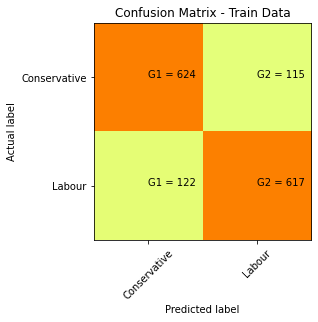

In [354]:
cm = confusion_matrix(train_labels_1, ytrain_predict_lr_13)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

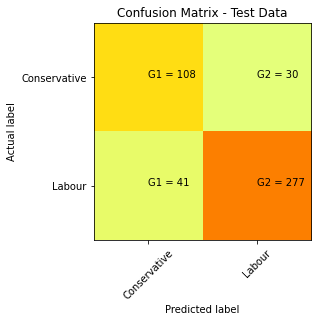

In [355]:
cm = confusion_matrix(test_labels, ytest_predict_lr_13)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [356]:
print(classification_report(train_labels_1,ytrain_predict_lr_13))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       739
           1       0.84      0.83      0.84       739

    accuracy                           0.84      1478
   macro avg       0.84      0.84      0.84      1478
weighted avg       0.84      0.84      0.84      1478



In [357]:
print(classification_report(test_labels,ytest_predict_lr_13))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       138
           1       0.90      0.87      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.83      0.82       456
weighted avg       0.85      0.84      0.85       456



ROC Curve and AUC score

AUC: 0.910


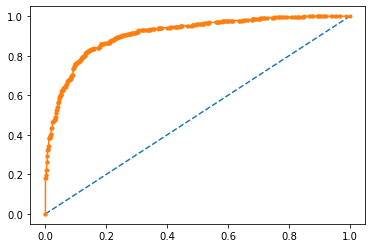

In [358]:
probs_tr_lr_13 = best_grid_lr_13.predict_proba(x_train_1)
probs_tr_lr_13 = probs_tr_lr_13[:, 1]
auc_tr_lr_13 = roc_auc_score(train_labels_1, probs_tr_lr_13)
print('AUC: %.3f' % auc_tr_lr_13)
fpr_tr_lr_13, tpr_tr_lr_13, thresholds_tr_lr_13 = roc_curve(train_labels_1, probs_tr_lr_13)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_lr_13, tpr_tr_lr_13, marker='.')
plt.show()

AUC: 0.917


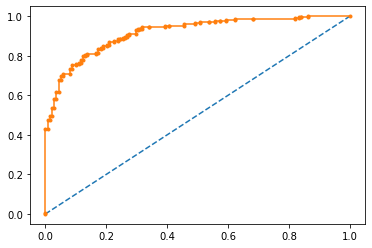

In [359]:
probs_te_lr_13 = best_grid_lr_13.predict_proba(x_test)
probs_te_lr_13 = probs_te_lr_13[:, 1]
auc_te_lr_13 = roc_auc_score(test_labels, probs_te_lr_13)
print('AUC: %.3f' % auc_te_lr_13)
fpr_te_lr_13, tpr_te_lr_13, thresholds_te_lr_13 = roc_curve(test_labels, probs_te_lr_13)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_lr_13, tpr_te_lr_13, marker='.')
plt.show()

**Model 14 - Linear Discriminant Analysis with SMOTE**

Accuracy

In [360]:
print("Training Data",round(best_grid_lda_14.score(x_train_1,train_labels_1),3))
print("Testing Data",round(best_grid_lda_14.score(x_test,test_labels),3))

Training Data 0.839
Testing Data 0.838


Confusion Matrix

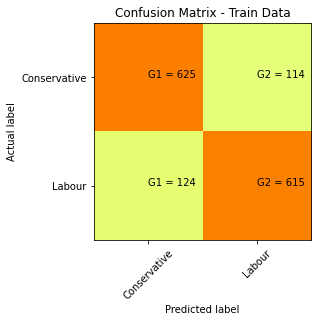

In [361]:
cm = confusion_matrix(train_labels_1, ytrain_predict_lda_14)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

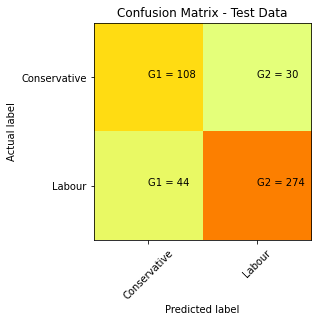

In [362]:
cm = confusion_matrix(test_labels, ytest_predict_lda_14)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [363]:
print(classification_report(train_labels_1,ytrain_predict_lda_14))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       739
           1       0.84      0.83      0.84       739

    accuracy                           0.84      1478
   macro avg       0.84      0.84      0.84      1478
weighted avg       0.84      0.84      0.84      1478



In [364]:
print(classification_report(test_labels,ytest_predict_lda_14))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       138
           1       0.90      0.86      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.82      0.81       456
weighted avg       0.84      0.84      0.84       456



ROC Curve and AUC score

AUC: 0.907


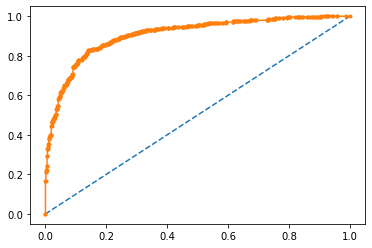

In [365]:
probs_tr_lda_14 = best_grid_lda_14.predict_proba(x_train_1)
probs_tr_lda_14 = probs_tr_lda_14[:, 1]
auc_tr_lda_14 = roc_auc_score(train_labels_1, probs_tr_lda_14)
print('AUC: %.3f' % auc_tr_lda_14)
fpr_tr_lda_14, tpr_tr_lda_14, thresholds_tr_lda_14 = roc_curve(train_labels_1, probs_tr_lda_14)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_lda_14, tpr_tr_lda_14, marker='.')
plt.show()

AUC: 0.916


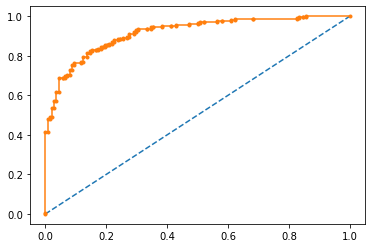

In [366]:
probs_te_lda_14 = best_grid_lda_14.predict_proba(x_test)
probs_te_lda_14 = probs_te_lda_14[:, 1]
auc_te_lda_14 = roc_auc_score(test_labels, probs_te_lda_14)
print('AUC: %.3f' % auc_te_lda_14)
fpr_te_lda_14, tpr_te_lda_14, thresholds_te_lda_14 = roc_curve(test_labels, probs_te_lda_14)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_lda_14, tpr_te_lda_14, marker='.')
plt.show()

**Model 15 - KNN model with SMOTE**

Accuracy

In [367]:
print("Training Data",round(best_grid_KNN_15.score(x_trains_1,train_labels_1),3))
print("Testing Data",round(best_grid_KNN_15.score(x_tests,test_labels),3))

Training Data 0.761
Testing Data 0.857


Confusion Matrix

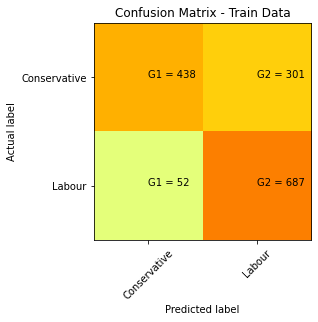

In [368]:
cm = confusion_matrix(train_labels_1, ytrain_predict_KNN_15)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

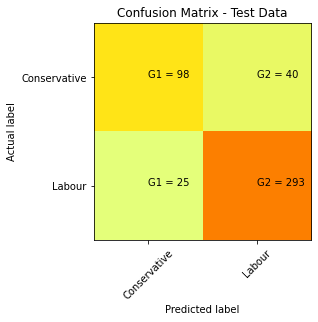

In [369]:
cm = confusion_matrix(test_labels, ytest_predict_KNN_15)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [370]:
print(classification_report(train_labels_1,ytrain_predict_KNN_15))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71       739
           1       0.70      0.93      0.80       739

    accuracy                           0.76      1478
   macro avg       0.79      0.76      0.75      1478
weighted avg       0.79      0.76      0.75      1478



In [371]:
print(classification_report(test_labels,ytest_predict_KNN_15))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.86      0.86       456



ROC Curve and AUC score

AUC: 0.889


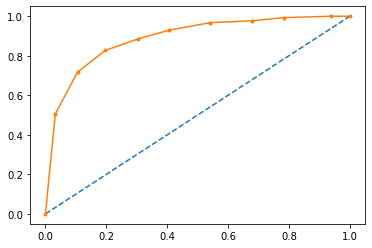

In [372]:
probs_tr_KNN_15 = best_grid_KNN_15.predict_proba(x_trains_1)
probs_tr_KNN_15 = probs_tr_KNN_15[:, 1]
auc_tr_KNN_15 = roc_auc_score(train_labels_1, probs_tr_KNN_15)
print('AUC: %.3f' % auc_tr_KNN_15)
fpr_tr_KNN_15, tpr_tr_KNN_15, thresholds_tr_KNN_15 = roc_curve(train_labels_1, probs_tr_KNN_15)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_KNN_15, tpr_tr_KNN_15, marker='.')
plt.show()

AUC: 0.889


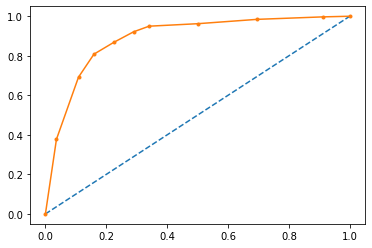

In [373]:
probs_te_KNN_15 = best_grid_KNN_15.predict_proba(x_tests)
probs_te_KNN_15 = probs_te_KNN_15[:, 1]
auc_te_KNN_15 = roc_auc_score(test_labels, probs_te_KNN_15)
print('AUC: %.3f' % auc_te_KNN_15)
fpr_te_KNN_15, tpr_te_KNN_15, thresholds_te_KNN_15 = roc_curve(test_labels, probs_te_KNN_15)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_KNN_15, tpr_te_KNN_15, marker='.')
plt.show()

**Model 16 - Naive Bayes with SMOTE**

Accuracy

In [374]:
print("Training Data",round(best_grid_NB_16.score(x_train_1,train_labels_1),3))
print("Testing Data",round(best_grid_NB_16.score(x_test,test_labels),3))

Training Data 0.827
Testing Data 0.831


Confusion Matrix

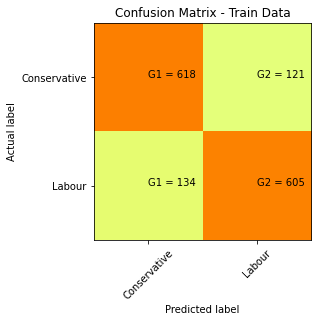

In [375]:
cm = confusion_matrix(train_labels_1, ytrain_predict_NB_16)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

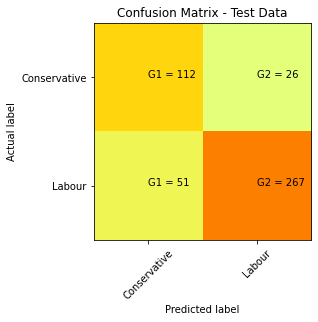

In [376]:
cm = confusion_matrix(test_labels, ytest_predict_NB_16)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [377]:
print(classification_report(train_labels_1,ytrain_predict_NB_16))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       739
           1       0.83      0.82      0.83       739

    accuracy                           0.83      1478
   macro avg       0.83      0.83      0.83      1478
weighted avg       0.83      0.83      0.83      1478



In [378]:
print(classification_report(test_labels,ytest_predict_NB_16))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       138
           1       0.91      0.84      0.87       318

    accuracy                           0.83       456
   macro avg       0.80      0.83      0.81       456
weighted avg       0.84      0.83      0.83       456



ROC Curve and AUC score

AUC: 0.895


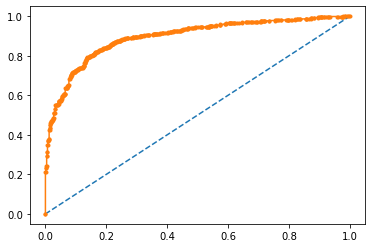

In [379]:
probs_tr_NB_16 = best_grid_NB_16.predict_proba(x_train_1)
probs_tr_NB_16 = probs_tr_NB_16[:, 1]
auc_tr_NB_16 = roc_auc_score(train_labels_1, probs_tr_NB_16)
print('AUC: %.3f' % auc_tr_NB_16)
fpr_tr_NB_16, tpr_tr_NB_16, thresholds_tr_NB_16 = roc_curve(train_labels_1, probs_tr_NB_16)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_NB_16, tpr_tr_NB_16, marker='.')
plt.show()

AUC: 0.912


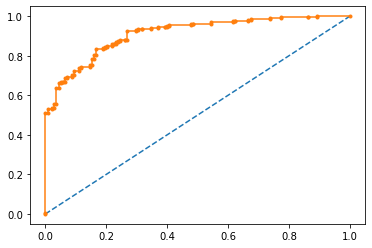

In [380]:
probs_te_NB_16 = best_grid_NB_16.predict_proba(x_test)
probs_te_NB_16 = probs_te_NB_16[:, 1]
auc_te_NB_16 = roc_auc_score(test_labels, probs_te_NB_16)
print('AUC: %.3f' % auc_te_NB_16)
fpr_te_NB_16, tpr_te_NB_16, thresholds_te_NB_16 = roc_curve(test_labels, probs_te_NB_16)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_NB_16, tpr_te_NB_16, marker='.')
plt.show()

**Model 17 - Bagging using Random Forest with SMOTE**

Accuracy

In [381]:
print("Training Data",round(model_bgcl_17.score(x_train_1,train_labels_1),3))
print("Testing Data",round(model_bgcl_17.score(x_test,test_labels),3))

Training Data 0.968
Testing Data 0.836


Confusion Matrix

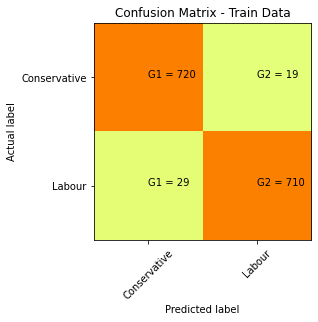

In [382]:
cm = confusion_matrix(train_labels_1, ytrain_predict_bgcl_17)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

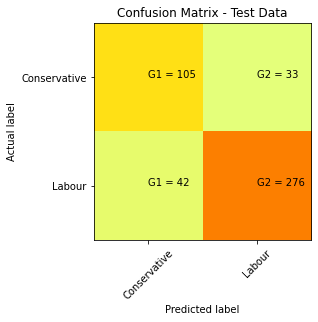

In [383]:
cm = confusion_matrix(test_labels, ytest_predict_bgcl_17)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [384]:
print(classification_report(train_labels_1,ytrain_predict_bgcl_17))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       739
           1       0.97      0.96      0.97       739

    accuracy                           0.97      1478
   macro avg       0.97      0.97      0.97      1478
weighted avg       0.97      0.97      0.97      1478



In [385]:
print(classification_report(test_labels,ytest_predict_bgcl_17))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       138
           1       0.89      0.87      0.88       318

    accuracy                           0.84       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



ROC Curve and AUC score

AUC: 0.998


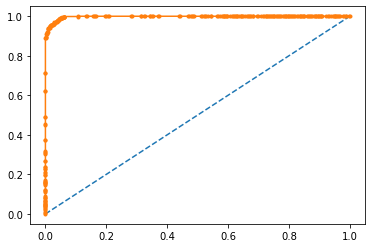

In [386]:
probs_tr_bgcl_17 = model_bgcl_17.predict_proba(x_train_1)
probs_tr_bgcl_17 = probs_tr_bgcl_17[:, 1]
auc_tr_bgcl_17 = roc_auc_score(train_labels_1, probs_tr_bgcl_17)
print('AUC: %.3f' % auc_tr_bgcl_17)
fpr_tr_bgcl_17, tpr_tr_bgcl_17, thresholds_tr_bgcl_17 = roc_curve(train_labels_1, probs_tr_bgcl_17)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_bgcl_17, tpr_tr_bgcl_17, marker='.')
plt.show()

AUC: 0.900


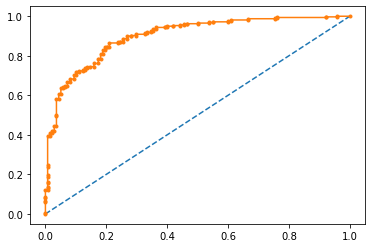

In [387]:
probs_te_bgcl_17 = model_bgcl_17.predict_proba(x_test)
probs_te_bgcl_17 = probs_te_bgcl_17[:, 1]
auc_te_bgcl_17 = roc_auc_score(test_labels, probs_te_bgcl_17)
print('AUC: %.3f' % auc_te_bgcl_17)
fpr_te_bgcl_17, tpr_te_bgcl_17, thresholds_te_bgcl_17 = roc_curve(test_labels, probs_te_bgcl_17)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_bgcl_17, tpr_te_bgcl_17, marker='.')
plt.show()

**Model 18 - Ada Boost Classifier with random forest base model with SMOTE**

Accuracy

In [388]:
print("Training Data",round(model_abcl_18.score(x_train_1,train_labels_1),3))
print("Testing Data",round(model_abcl_18.score(x_test,test_labels),3))

Training Data 0.999
Testing Data 0.836


Confusion Matrix

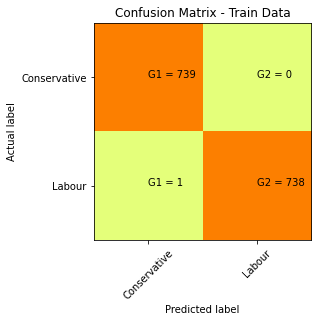

In [389]:
cm = confusion_matrix(train_labels_1, ytrain_predict_abcl_18)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

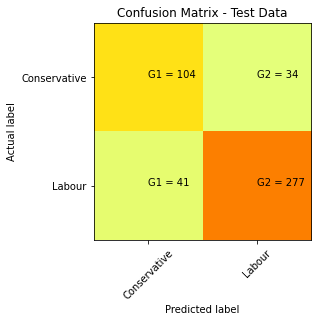

In [390]:
cm = confusion_matrix(test_labels, ytest_predict_abcl_18)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [391]:
print(classification_report(train_labels_1,ytrain_predict_abcl_18))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1478
   macro avg       1.00      1.00      1.00      1478
weighted avg       1.00      1.00      1.00      1478



In [392]:
print(classification_report(test_labels,ytest_predict_abcl_18))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       138
           1       0.89      0.87      0.88       318

    accuracy                           0.84       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



ROC Curve and AUC score

AUC: 1.000


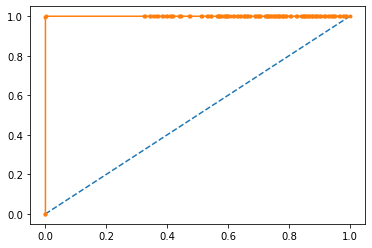

In [393]:
probs_tr_abcl_18 = model_abcl_18.predict_proba(x_train_1)
probs_tr_abcl_18 = probs_tr_abcl_18[:, 1]
auc_tr_abcl_18 = roc_auc_score(train_labels_1, probs_tr_abcl_18)
print('AUC: %.3f' % auc_tr_abcl_18)
fpr_tr_abcl_18, tpr_tr_abcl_18, thresholds_tr_abcl_18 = roc_curve(train_labels_1, probs_tr_abcl_18)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_abcl_18, tpr_tr_abcl_18, marker='.')
plt.show()

AUC: 0.893


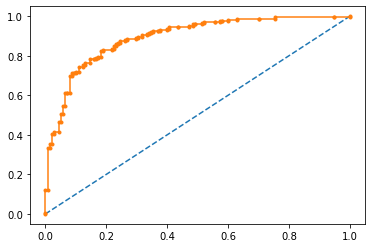

In [394]:
probs_te_abcl_18 = model_abcl_18.predict_proba(x_test)
probs_te_abcl_18 = probs_te_abcl_18[:, 1]
auc_te_abcl_18 = roc_auc_score(test_labels, probs_te_abcl_18)
print('AUC: %.3f' % auc_te_abcl_18)
fpr_te_abcl_18, tpr_te_abcl_18, thresholds_te_abcl_18 = roc_curve(test_labels, probs_te_abcl_18)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_abcl_18, tpr_te_abcl_18, marker='.')
plt.show()

**Model 19 - Ada Boost without base modeal using SMOTE**

Accuracy

In [395]:
print("Training Data",round(model_abcl_19.score(x_train_1,train_labels_1),3))
print("Testing Data",round(model_abcl_19.score(x_test,test_labels),3))

Training Data 0.863
Testing Data 0.831


Confusion Matrix

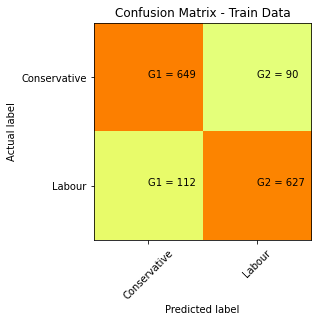

In [396]:
cm = confusion_matrix(train_labels_1, ytrain_predict_abcl_19)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

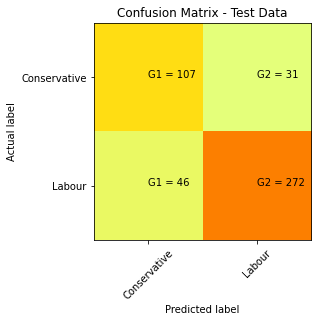

In [397]:
cm = confusion_matrix(test_labels, ytest_predict_abcl_19)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [398]:
print(classification_report(train_labels_1,ytrain_predict_abcl_19))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       739
           1       0.87      0.85      0.86       739

    accuracy                           0.86      1478
   macro avg       0.86      0.86      0.86      1478
weighted avg       0.86      0.86      0.86      1478



In [399]:
print(classification_report(test_labels,ytest_predict_abcl_19))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       138
           1       0.90      0.86      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.82      0.81       456
weighted avg       0.84      0.83      0.83       456



ROC Curve and AUC score

AUC: 0.930


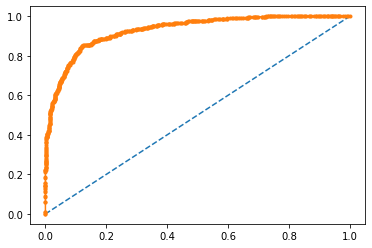

In [400]:
probs_tr_abcl_19 = model_abcl_19.predict_proba(x_train_1)
probs_tr_abcl_19 = probs_tr_abcl_19[:, 1]
auc_tr_abcl_19 = roc_auc_score(train_labels_1, probs_tr_abcl_19)
print('AUC: %.3f' % auc_tr_abcl_19)
fpr_tr_abcl_19, tpr_tr_abcl_19, thresholds_tr_abcl_19 = roc_curve(train_labels_1, probs_tr_abcl_19)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_abcl_19, tpr_tr_abcl_19, marker='.')
plt.show()

AUC: 0.907


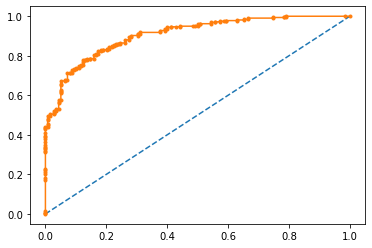

In [401]:
probs_te_abcl_19 = model_abcl_19.predict_proba(x_test)
probs_te_abcl_19 = probs_te_abcl_19[:, 1]
auc_te_abcl_19 = roc_auc_score(test_labels, probs_te_abcl_19)
print('AUC: %.3f' % auc_te_abcl_19)
fpr_te_abcl_19, tpr_te_abcl_19, thresholds_te_abcl_19 = roc_curve(test_labels, probs_te_abcl_19)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_abcl_19, tpr_te_abcl_19, marker='.')
plt.show()

**Model 20 - Gradient Boosting with SMOTE**

Accuracy

In [402]:
print("Training Data",round(model_gbcl_20.score(x_train_1,train_labels_1),3))
print("Testing Data",round(model_gbcl_20.score(x_test,test_labels),3))

Training Data 0.894
Testing Data 0.825


Confusion Matrix

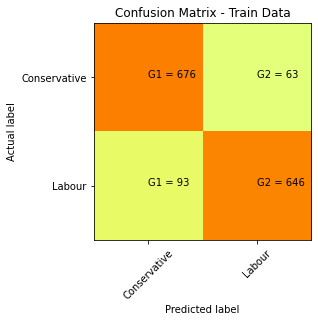

In [403]:
cm = confusion_matrix(train_labels_1, ytrain_predict_gbcl_20)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

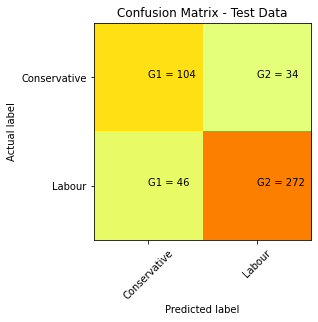

In [404]:
cm = confusion_matrix(test_labels, ytest_predict_gbcl_20)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Classification Report

In [405]:
print(classification_report(train_labels_1,ytrain_predict_gbcl_20))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       739
           1       0.91      0.87      0.89       739

    accuracy                           0.89      1478
   macro avg       0.90      0.89      0.89      1478
weighted avg       0.90      0.89      0.89      1478



In [406]:
print(classification_report(test_labels,ytest_predict_gbcl_20))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       138
           1       0.89      0.86      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.80      0.80       456
weighted avg       0.83      0.82      0.83       456



ROC Curve and AUC score

AUC: 0.955


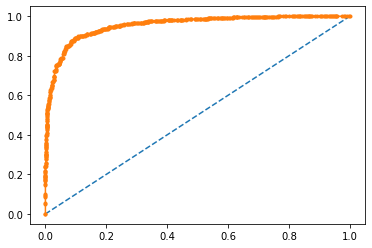

In [407]:
probs_tr_gbcl_20 = model_gbcl_20.predict_proba(x_train_1)
probs_tr_gbcl_20 = probs_tr_gbcl_20[:, 1]
auc_tr_gbcl_20 = roc_auc_score(train_labels_1, probs_tr_gbcl_20)
print('AUC: %.3f' % auc_tr_gbcl_20)
fpr_tr_gbcl_20, tpr_tr_gbcl_20, thresholds_tr_gbcl_20 = roc_curve(train_labels_1, probs_tr_gbcl_20)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_gbcl_20, tpr_tr_gbcl_20, marker='.')
plt.show()


AUC: 0.906


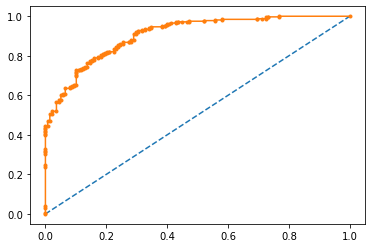

In [408]:
probs_te_gbcl_20 = model_gbcl_20.predict_proba(x_test)
probs_te_gbcl_20 = probs_te_gbcl_20[:, 1]
auc_te_gbcl_20 = roc_auc_score(test_labels, probs_te_gbcl_20)
print('AUC: %.3f' % auc_te_gbcl_20)
fpr_te_gbcl_20, tpr_te_gbcl_20, thresholds_te_gbcl_20 = roc_curve(test_labels, probs_te_gbcl_20)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_gbcl_20, tpr_te_gbcl_20, marker='.')
plt.show()

**Final Model ROC curve and AUC score ( For the selected three models )**

Training Data

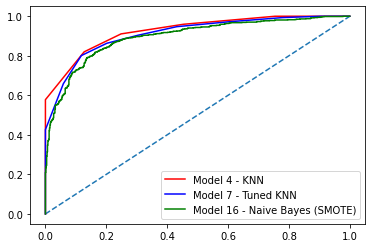

In [409]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_KNN_4, tpr_tr_KNN_4,color="red",label="Model 4 - KNN")
plt.plot(fpr_tr_KNN_7, tpr_tr_KNN_7,color="blue",label="Model 7 - Tuned KNN")
plt.plot(fpr_tr_NB_16, tpr_tr_NB_16,color="green",label="Model 16 - Naive Bayes (SMOTE)")
plt.legend()
plt.show()

Testing Data

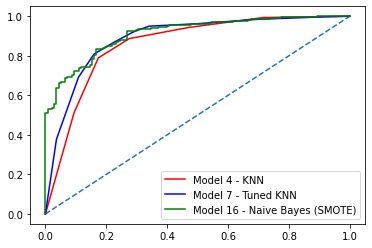

In [410]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_KNN_4, tpr_te_KNN_4,color="red",label="Model 4 - KNN")
plt.plot(fpr_te_KNN_7, tpr_te_KNN_7,color="blue",label="Model 7 - Tuned KNN")
plt.plot(fpr_te_NB_16, tpr_te_NB_16,color="green",label="Model 16 - Naive Bayes (SMOTE)")
plt.legend()
plt.show()

In [411]:
ypred = best_grid_NB_16.predict(x)

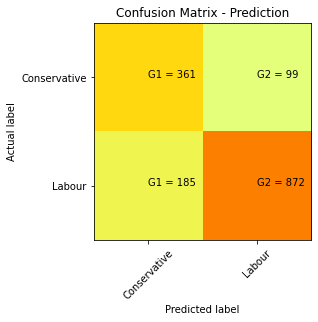

In [412]:
cm = confusion_matrix(y, ypred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Prediction')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

**1.8 Based on these predictions, what are the insights? (5 marks)**

# In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

#    President Franklin D. Roosevelt in 1941
#    President John F. Kennedy in 1961
#    President Richard Nixon in 1973


In [413]:
import nltk
#nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [414]:
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [415]:
str1=inaugural.raw('1941-Roosevelt.txt')

In [416]:
str1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [417]:
str2=inaugural.raw('1961-Kennedy.txt')

In [418]:
str2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [419]:
str3=inaugural.raw('1973-Nixon.txt')

In [420]:
str3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

**2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks**

1941 - Roosevelt Inaugural speech

In [421]:
len(str1)

7571

In [422]:
#Characters
print(len(inaugural.raw("1941-Roosevelt.txt").strip()))

7570


In [423]:
#words
print(len(inaugural.words("1941-Roosevelt.txt")))

1536


In [424]:
#sentences
print(len(inaugural.sents("1941-Roosevelt.txt")))

68


String 2 - 1961 - Kennedy inaugural speech

In [425]:
len(str2)

7618

In [426]:
#Characters
print(len(inaugural.raw("1961-Kennedy.txt").strip()))

7617


In [427]:
#words
print(len(inaugural.words("1961-Kennedy.txt")))

1546


In [428]:
#sentences
print(len(inaugural.sents("1961-Kennedy.txt")))

52


String 3 - 1973 Nixon inaugural speech

In [429]:
len(str3)

9991

In [430]:
#Characters
print(len(inaugural.raw("1973-Nixon.txt").strip()))

9990


In [431]:
#words
print(len(inaugural.words("1973-Nixon.txt")))

2028


In [432]:
#sentences
print(len(inaugural.sents("1973-Nixon.txt")))

69


**2.2 Remove all the stopwords from all three speeches. – 3 Marks**

In [433]:
from nltk.corpus import stopwords

In [434]:
import string

In [435]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [436]:
stop=stopwords.words('english')+list(string.punctuation)

In [437]:
additional=["--"]

In [438]:
stop.extend(additional)
stop=set(stop)

In [439]:
print(stop)

{'yourselves', "you've", 'these', 'been', 'their', 'until', 'only', 'here', "mustn't", "weren't", 'herself', '-', 'my', 'd', 'now', 'again', 'other', '{', 'after', 'will', "don't", 'our', 'if', '/', 'the', "hadn't", "shouldn't", 'shan', '`', 'of', "she's", 'in', 'during', 'such', 'your', 'himself', "shan't", '"', 'those', "couldn't", "'", 'just', "you'll", 'her', '\\', "mightn't", 'y', '(', 'by', 'wasn', '^', 'he', 'we', 'isn', 'has', '_', 'which', 'had', 't', 'more', "you'd", 'not', 'should', 'or', 'for', '=', ']', 'them', 'each', 'i', 'nor', 'ain', "you're", 'ma', "didn't", 'but', "wasn't", 'was', "isn't", 'they', 'no', "haven't", 'same', 'off', 've', '--', ';', '$', '?', '~', '*', 'into', 'yours', 'it', 'against', 'own', 'don', 'themselves', 'while', 'there', 'than', 'wouldn', 'ourselves', 'does', 'both', '.', '%', 'so', 'she', ':', 'further', 'some', "wouldn't", 'what', 'with', '#', '>', "doesn't", 'that', 'when', 'all', 'won', 'at', 'itself', 'myself', 'from', 'didn', 'its', 'do',

In [440]:
def remove_stopwords(text):
    lower=(word.lower() for word in inaugural.words(text))
    cleaned=[word for word in lower if word not in stop]
    return cleaned

In [441]:
words_1=inaugural.words("1941-Roosevelt.txt")

In [442]:
words_2=inaugural.words("1961-Kennedy.txt")

In [443]:
words_3=inaugural.words("1973-Nixon.txt")

In [444]:
cleaned_1=remove_stopwords("1941-Roosevelt.txt")

In [445]:
cleaned_2=remove_stopwords("1961-Kennedy.txt")

In [446]:
cleaned_3=remove_stopwords("1973-Nixon.txt")

In [447]:
cleaned_1

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [448]:
cleaned_2

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike'

In [449]:
cleaned_3

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


No. of words after removal of stopwords

In [450]:
len(cleaned_1)

632

In [451]:
len(cleaned_2)

697

In [452]:
len(cleaned_3)

836

In [453]:
clean_1=" ".join(cleaned_1)

In [454]:
clean_2=" ".join(cleaned_2)

In [455]:
clean_3=" ".join(cleaned_3)

In [456]:
clean_1

'national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding life ideals measured material things

In [457]:
clean_2

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival 

In [458]:
clean_3

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw far reaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations

**2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks**

In [459]:
nltk.FreqDist(cleaned_1).most_common(3)

[('nation', 12), ('know', 10), ('spirit', 9)]

In [460]:
nltk.FreqDist(cleaned_2).most_common(3)

[('let', 16), ('us', 12), ('world', 8)]

In [461]:
nltk.FreqDist(cleaned_3).most_common(3)

[('us', 26), ('let', 22), ('america', 21)]

**2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]**

In [462]:
from wordcloud import WordCloud

Word cloud for Roosevelt after cleaning


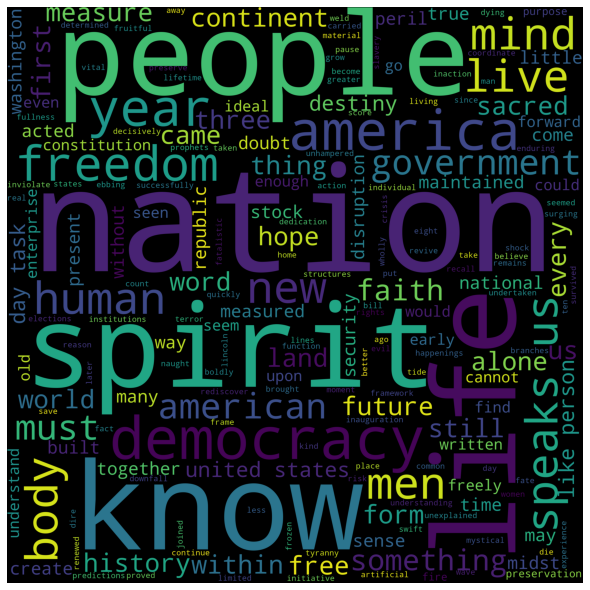

In [463]:
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                stopwords = stop,
                min_font_size = 10, random_state=1).generate(clean_1)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel("Word Cloud")
plt.tight_layout(pad=0)

print("Word cloud for Roosevelt after cleaning")
plt.show()

Word cloud for Kennedy after cleaning


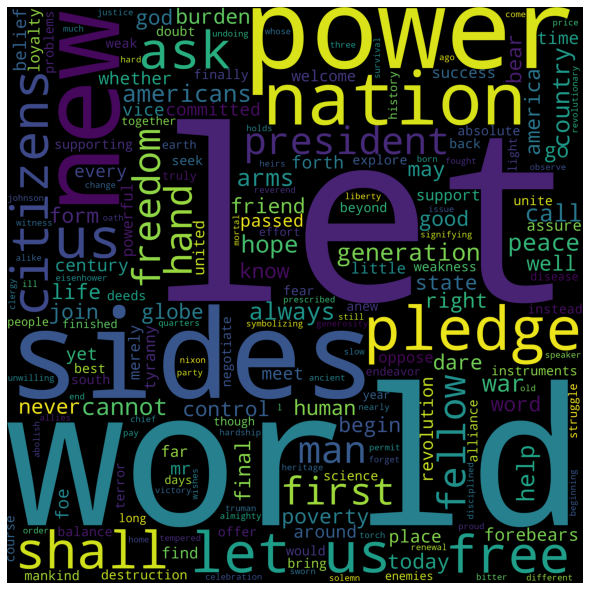

In [464]:
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                stopwords = stop,
                min_font_size = 10, random_state=1).generate(clean_2)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel("Word Cloud")
plt.tight_layout(pad=0)

print("Word cloud for Kennedy after cleaning")
plt.show()

Word cloud for Nixon after cleaning


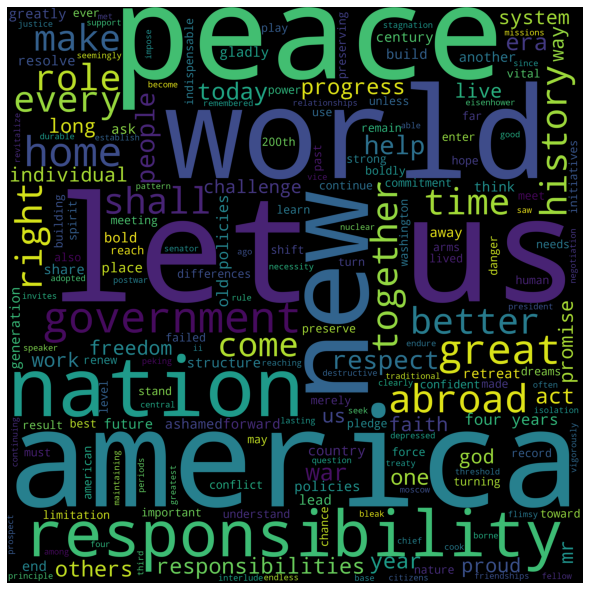

In [465]:
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                stopwords = stop,
                min_font_size = 10, random_state=1).generate(clean_3)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel("Word Cloud")
plt.tight_layout(pad=0)

print("Word cloud for Nixon after cleaning")
plt.show()